# 1. Introduction
<center>
<img src="https://cdn.pixabay.com/photo/2020/09/14/10/45/spaceship-5570682__340.jpg" width=1000 height=1000 />
</center>

<font size="3">Hello Kagglers, we have a challenge here, to use our data science skills to solve the cosmic mystery and retrieve the lost passengers. This is an extensive manual on binary classification utilizing the dataset from the Spaceship Titanic.</font>

<font size="3">Table of Contents:</font>
* <font size="3">1. INTRODUCTION</font>
* <font size="3"> 2. IMPORTS</font>
* <font size="3"> 3. EXPLORATORY DATA ANALYSIS</font>
    - <font size="3">3.1 Target Analysis</font>
    - <font size="3">3.2 Numerical Feature Analysis</font>
        - <font size="3">3.2.1 Train Test Distributions</font>
        - <font size="3">3.2.2 Feature Target Distributions</font>
        - <font size="3">3.2.3 Bivariate Analysis</font>
            - <font size="3">3.2.3.1 Pair Plots</font>
            - <font size="3">3.2.3.2 Violion Plots</font>
            - <font size="3">3.2.3.3 t-test</font>
            - <font size="3">3.2.3.4 ANOVA</font>
            - <font size="3">3.2.3.5 Alternate Method to Pair Plots</font>
    - <font size="3">3.3 Categorical/Discrete Feature Analysis</font>
    - <font size="3">3.4 Correlation Plot</font>
* <font size="3"> 4. DATA CLEANING</font>
    - <font size="3">4.1 Passenger Group & Cabin</font>
    - <font size="3">4.2 Name</font>
    - <font size="3">4.3 Handling Missing Values</font>
* <font size="3"> 5. FEATURE ENGINEERING</font>
    - <font size="3">5.1 Numerical Transformations: Transformation Selection Explained</font> 
    - <font size="3">5.2 Encoding Techniques: Multiple Encoding Techniques Implemented</font>
    - <font size="3">5.3 TFIDF-PCA (Text Transformation)</font>
    - <font size="3">5.4 Encoding Techniques</font>
    - <font size="3">5.5 Group Clustered-One Hot Transformation: Something Different!</font>
    - <font size="3">5.6 Multiplicaive Features</font>
    - <font size="3">5.7 Less important features</font>
    - <font size="3">5.8 Feature Elimination/Selection</font>
* <font size="3"> 6. Scaling Data</font>
* <font size="3"> 7. Model Development</font>
   - <font size="3">7.1 Define & Tune Models : 16 Models with Hyperparameter Tuning</font>
   - <font size="3">7.2 Model Selection</font>
   - <font size="3">7.3 Ensembling Optimizer </font>
   - <font size="3">7.4 Model Training</font>
   - <font size="3">7.5 Feature Importance</font>
   - <font size="3">7.6 Results</font> 
    

<a id="2"></a>
# 2. Import Libraries and Data

In [37]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
import optuna
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


In [38]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<a id="2.1"></a>
## 2.1 Data Description
1. **PassengerId** - <font size="3">A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.</font>

2. **HomePlanet** - <font size="3">The planet the passenger departed from, typically their planet of permanent residence.</font>
3. **CryoSleep** - <font size="3">Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</font>
4. **Cabin** - <font size="3">The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.</font>
5. **Destination** - <font size="3">The planet the passenger will be debarking to.</font>
6. **Age** - <font size="3">The age of the passenger.</font>
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.</font>
8. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - <font size="3">Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.</font>
9. **Name** - <font size="3">The first and last names of the passenger.</font>
10. <span style="color:blue">**Transported** - <font size="3">Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict</font>.</span>

<a id="2.2"></a>
## 2.2 Check Missing Values

In [39]:
table = PrettyTable()

table.field_names = ['Column Name', 'Data Type', 'Non-Null Count']
for column in train.columns:
    data_type = str(train[column].dtype)
    non_null_count = train[column].count()
    table.add_row([column, data_type, non_null_count])
print(table)


+--------------+-----------+----------------+
| Column Name  | Data Type | Non-Null Count |
+--------------+-----------+----------------+
| PassengerId  |   object  |      8693      |
|  HomePlanet  |   object  |      8492      |
|  CryoSleep   |   object  |      8476      |
|    Cabin     |   object  |      8494      |
| Destination  |   object  |      8511      |
|     Age      |  float64  |      8514      |
|     VIP      |   object  |      8490      |
| RoomService  |  float64  |      8512      |
|  FoodCourt   |  float64  |      8510      |
| ShoppingMall |  float64  |      8485      |
|     Spa      |  float64  |      8510      |
|    VRDeck    |  float64  |      8505      |
|     Name     |   object  |      8493      |
| Transported  |    bool   |      8693      |
+--------------+-----------+----------------+


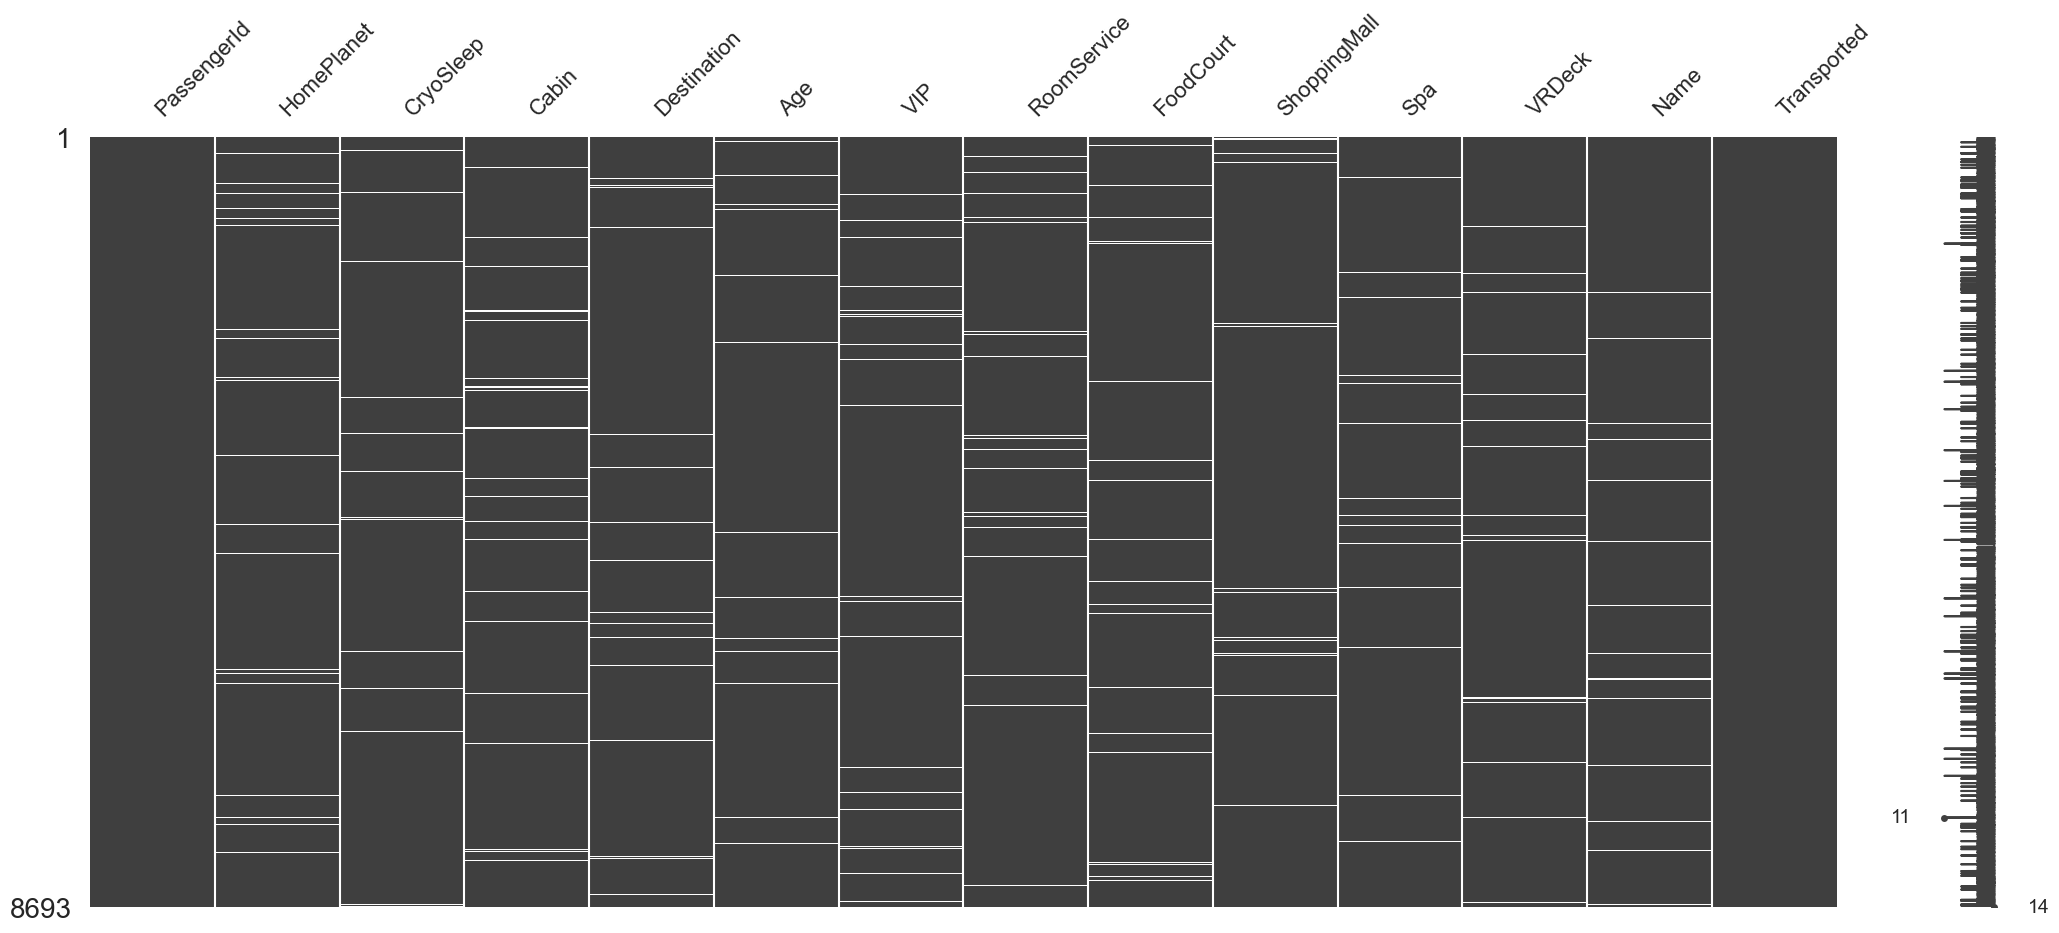

In [40]:
msno.matrix(train)
plt.show()

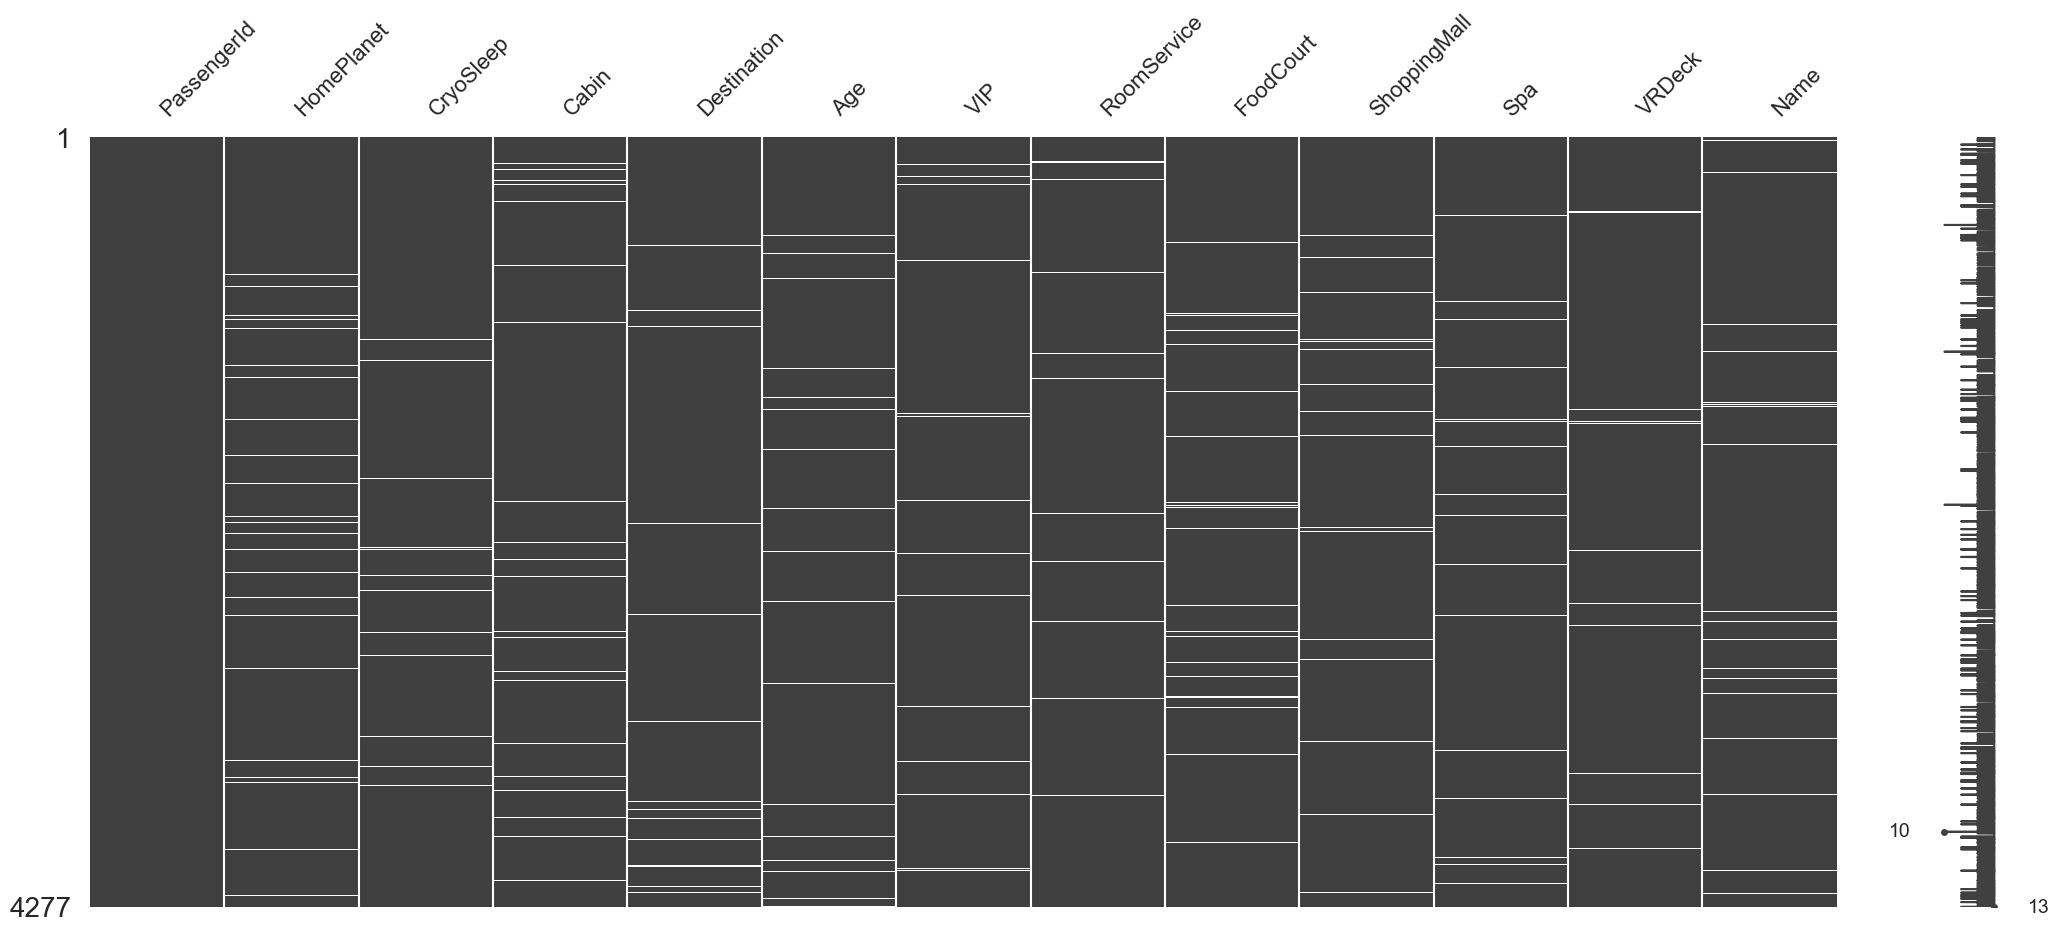

In [41]:
msno.matrix(test)
plt.show()

<font size="3">Looks like we have a many missing values, let's try to deal with them with the help of EDA

<a id="3"></a>
# 3. Exploratory Data Analysis

<a id="3.1"></a>
## 3.1 Target Analysis

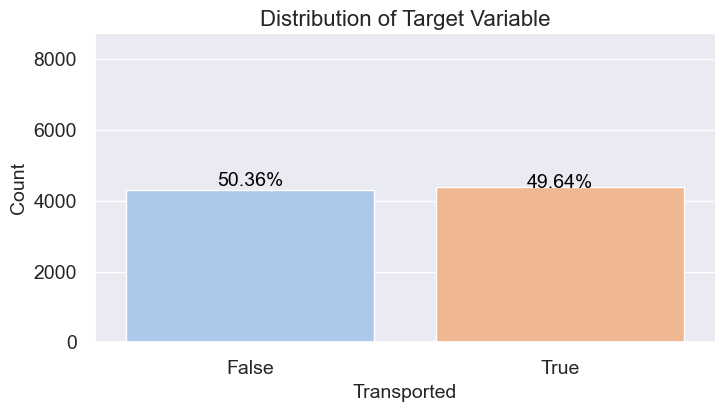

In [42]:
# Calculate the proportion of each class
class_counts = train['Transported'].value_counts()
class_proportions = class_counts / train.shape[0]
class_proportions = class_proportions.values.tolist()
class_proportions_str = [f'{prop:.2%}' for prop in class_proportions]

# Set the color palette
colors = sns.color_palette('pastel')[0:len(class_counts)]

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train, palette=colors)
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(train)])
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, class_proportions_str[i], ha='center', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

<font size="3">We have about same % of people who got transported and not. So, the data is indeed balanced and accuary is a good metric to choose while we build the models

<a id="3.2"></a>
## 3.2 Numerical Features Analysis

<a id="3.2.1"></a>
### 3.2.1 Train & Test Data Distributions

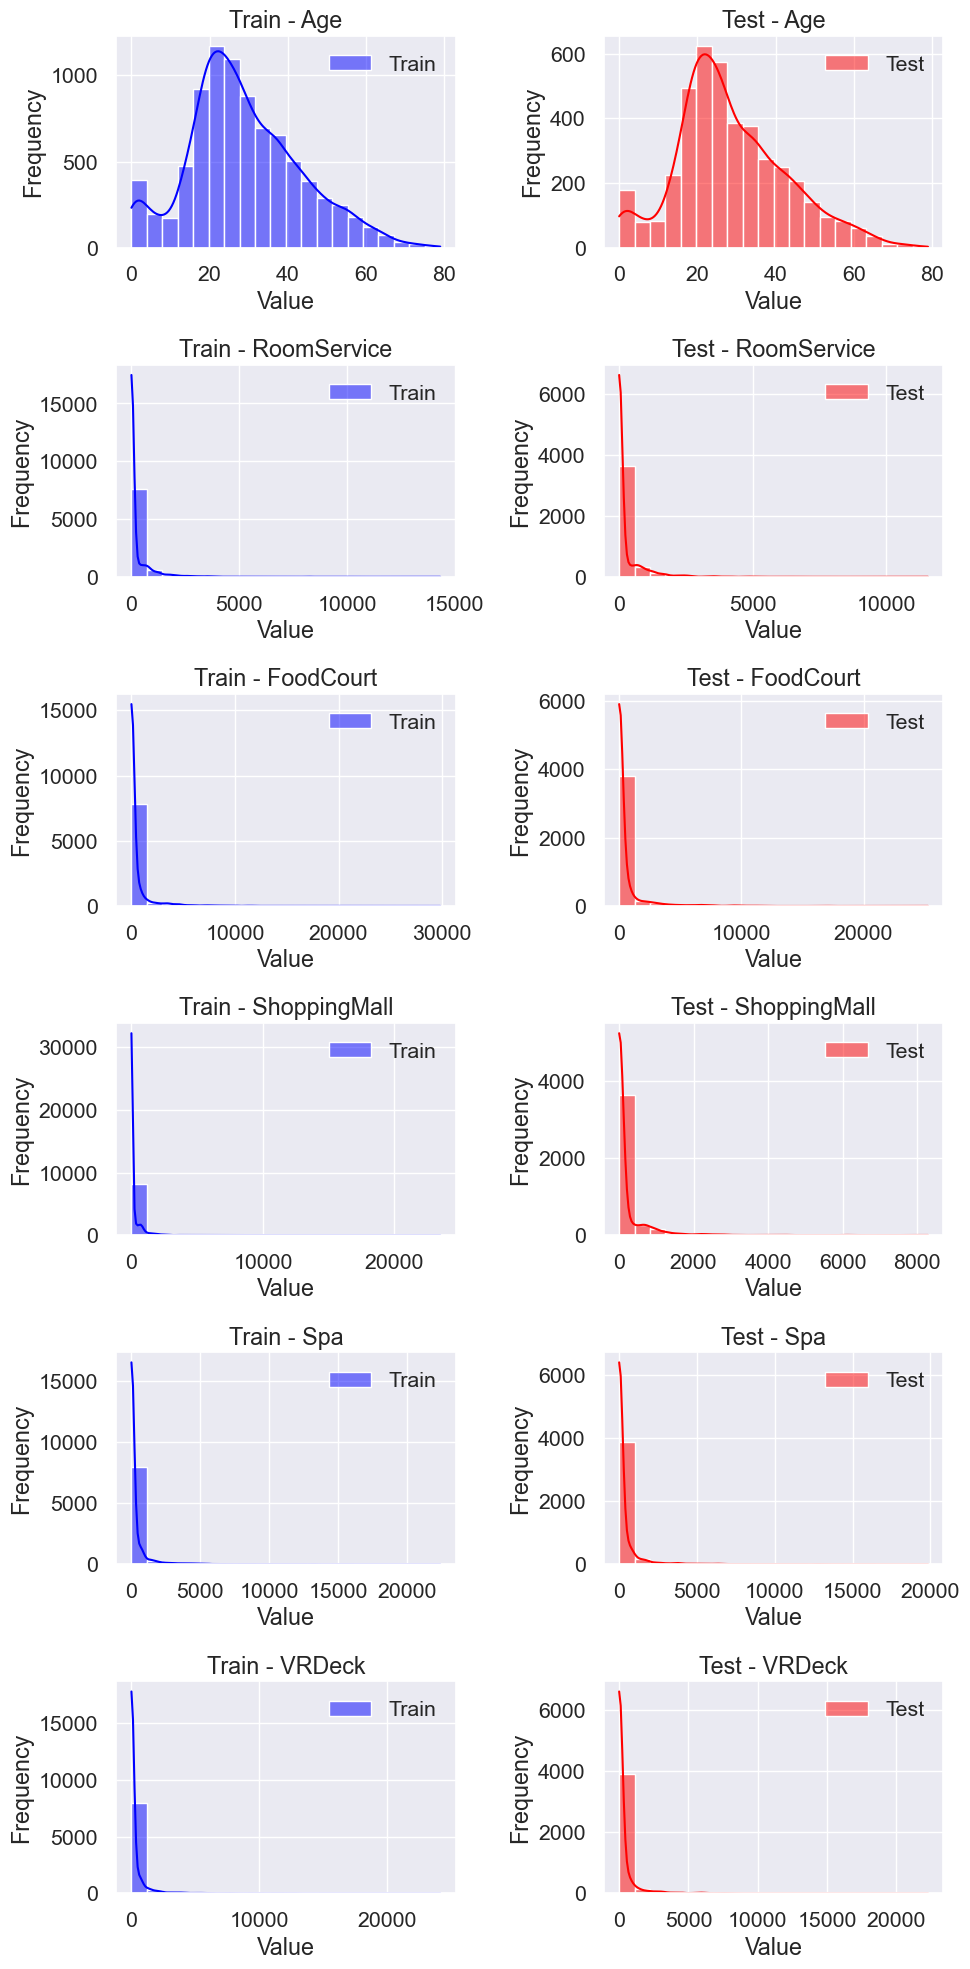

In [43]:
cont_cols=[f for f in train.columns if train[f].dtype in [float,int] and train[f].nunique()>3]

# Create subplots for each continuous column
fig, axs = plt.subplots(len(cont_cols), 2, figsize=(10,20))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    # Determine the range of values to plot
    max_val = max(train[col].max(), test[col].max())
    min_val = min(train[col].min(), test[col].min())
    range_val = max_val - min_val
    
    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)
    
    # Plot the histograms
    sns.histplot(train[col], ax=axs[i][0], color='blue', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(test[col], ax=axs[i][1], color='red', kde=True, label='Test', bins=num_bins_test)
    axs[i][0].set_title(f'Train - {col}')
    axs[i][0].set_xlabel('Value')
    axs[i][0].set_ylabel('Frequency')
    axs[i][1].set_title(f'Test - {col}')
    axs[i][1].set_xlabel('Value')
    axs[i][1].set_ylabel('Frequency')
    axs[i][0].legend()
    axs[i][1].legend()

plt.tight_layout()
plt.show()

<font size="3">**Inferences**:

<font size="3">From the distributions of the continuous features, one thing we can clearly understand is that they are skewed and have outliers. So, we can consider options like log transformations

<a id="3.2.2"></a>
### 3.2.2 Train Data Distributions across Classes

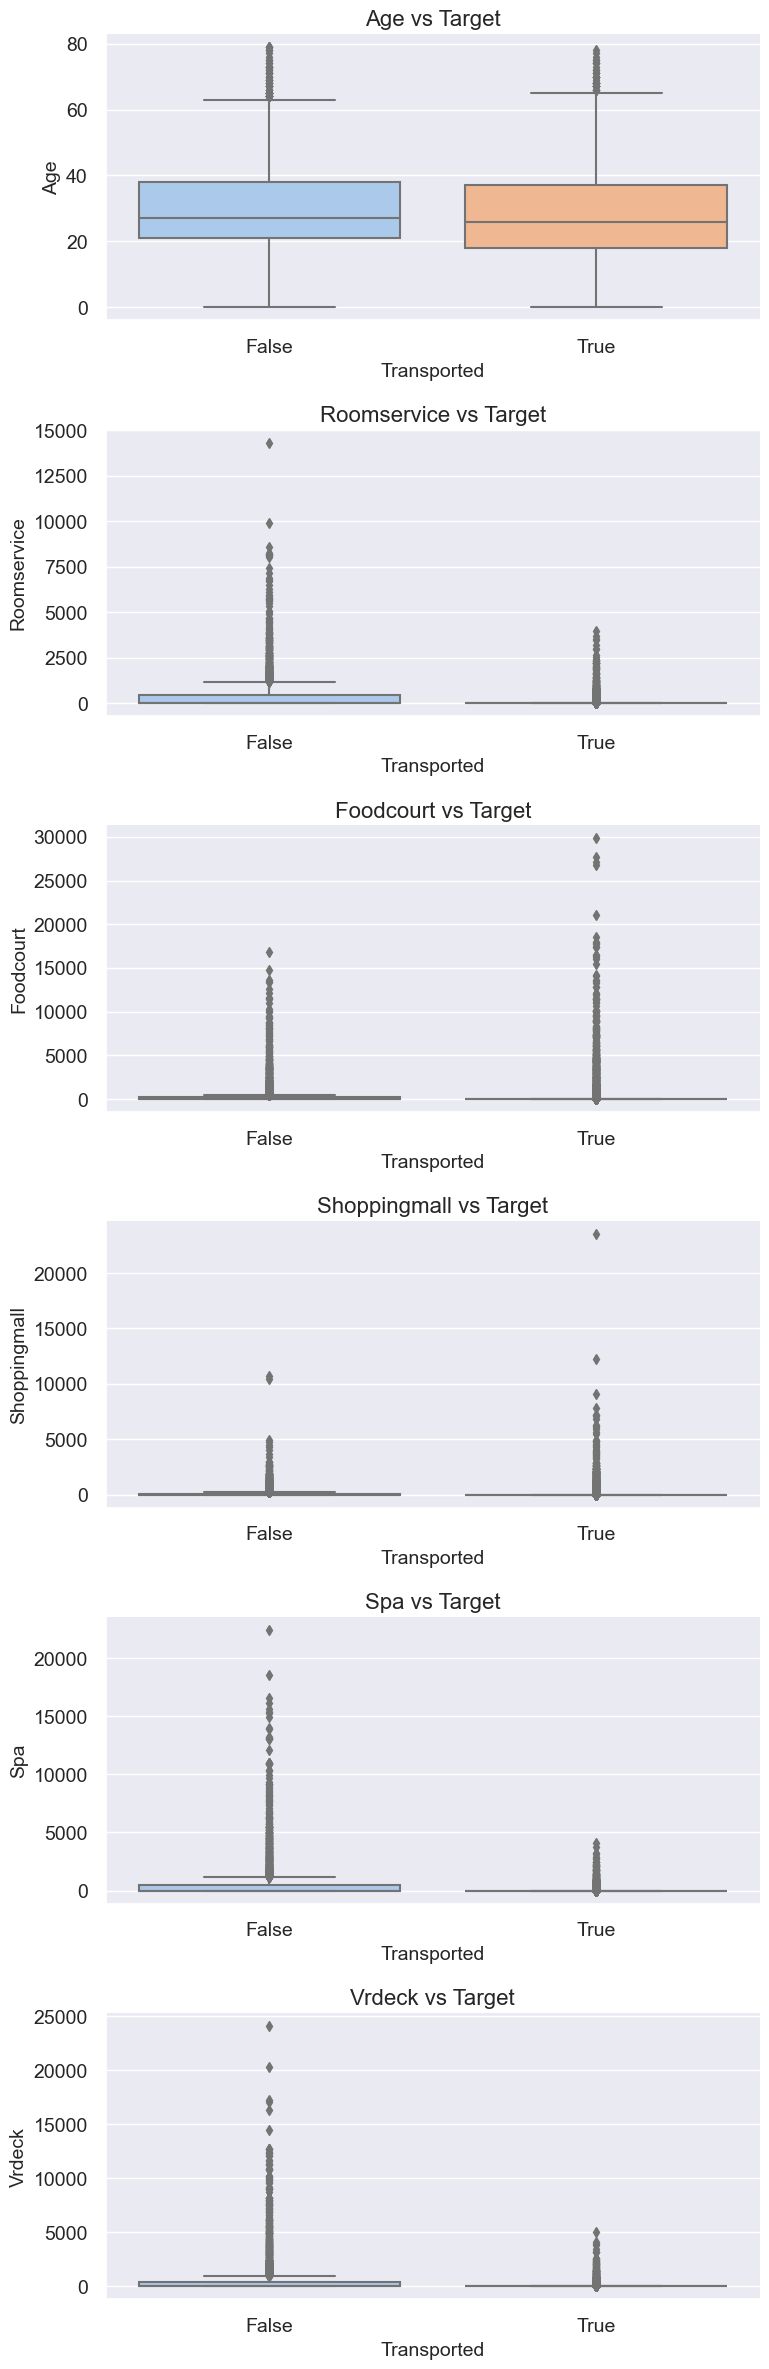

In [44]:
# Create subplots for each continuous feature
fig, axs = plt.subplots(nrows=len(cont_cols), figsize=(8, 4 * len(cont_cols)))
for i, col in enumerate(cont_cols):
    sns.boxplot(x='Transported', y=col, data=train, ax=axs[i], palette='pastel')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Transported', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Distributions between both the classes tell us that using these features directly into model would hinder the performance.
These are the things that we could try:
1. Create Bins
2. Use algorithms that are unaffected by outliers

<a id="3.2.3"></a>
### 3.2.3 Bivariate Analysis

<a id="3.2.3.1"></a>
#### 3.2.3.1 Pair Plots

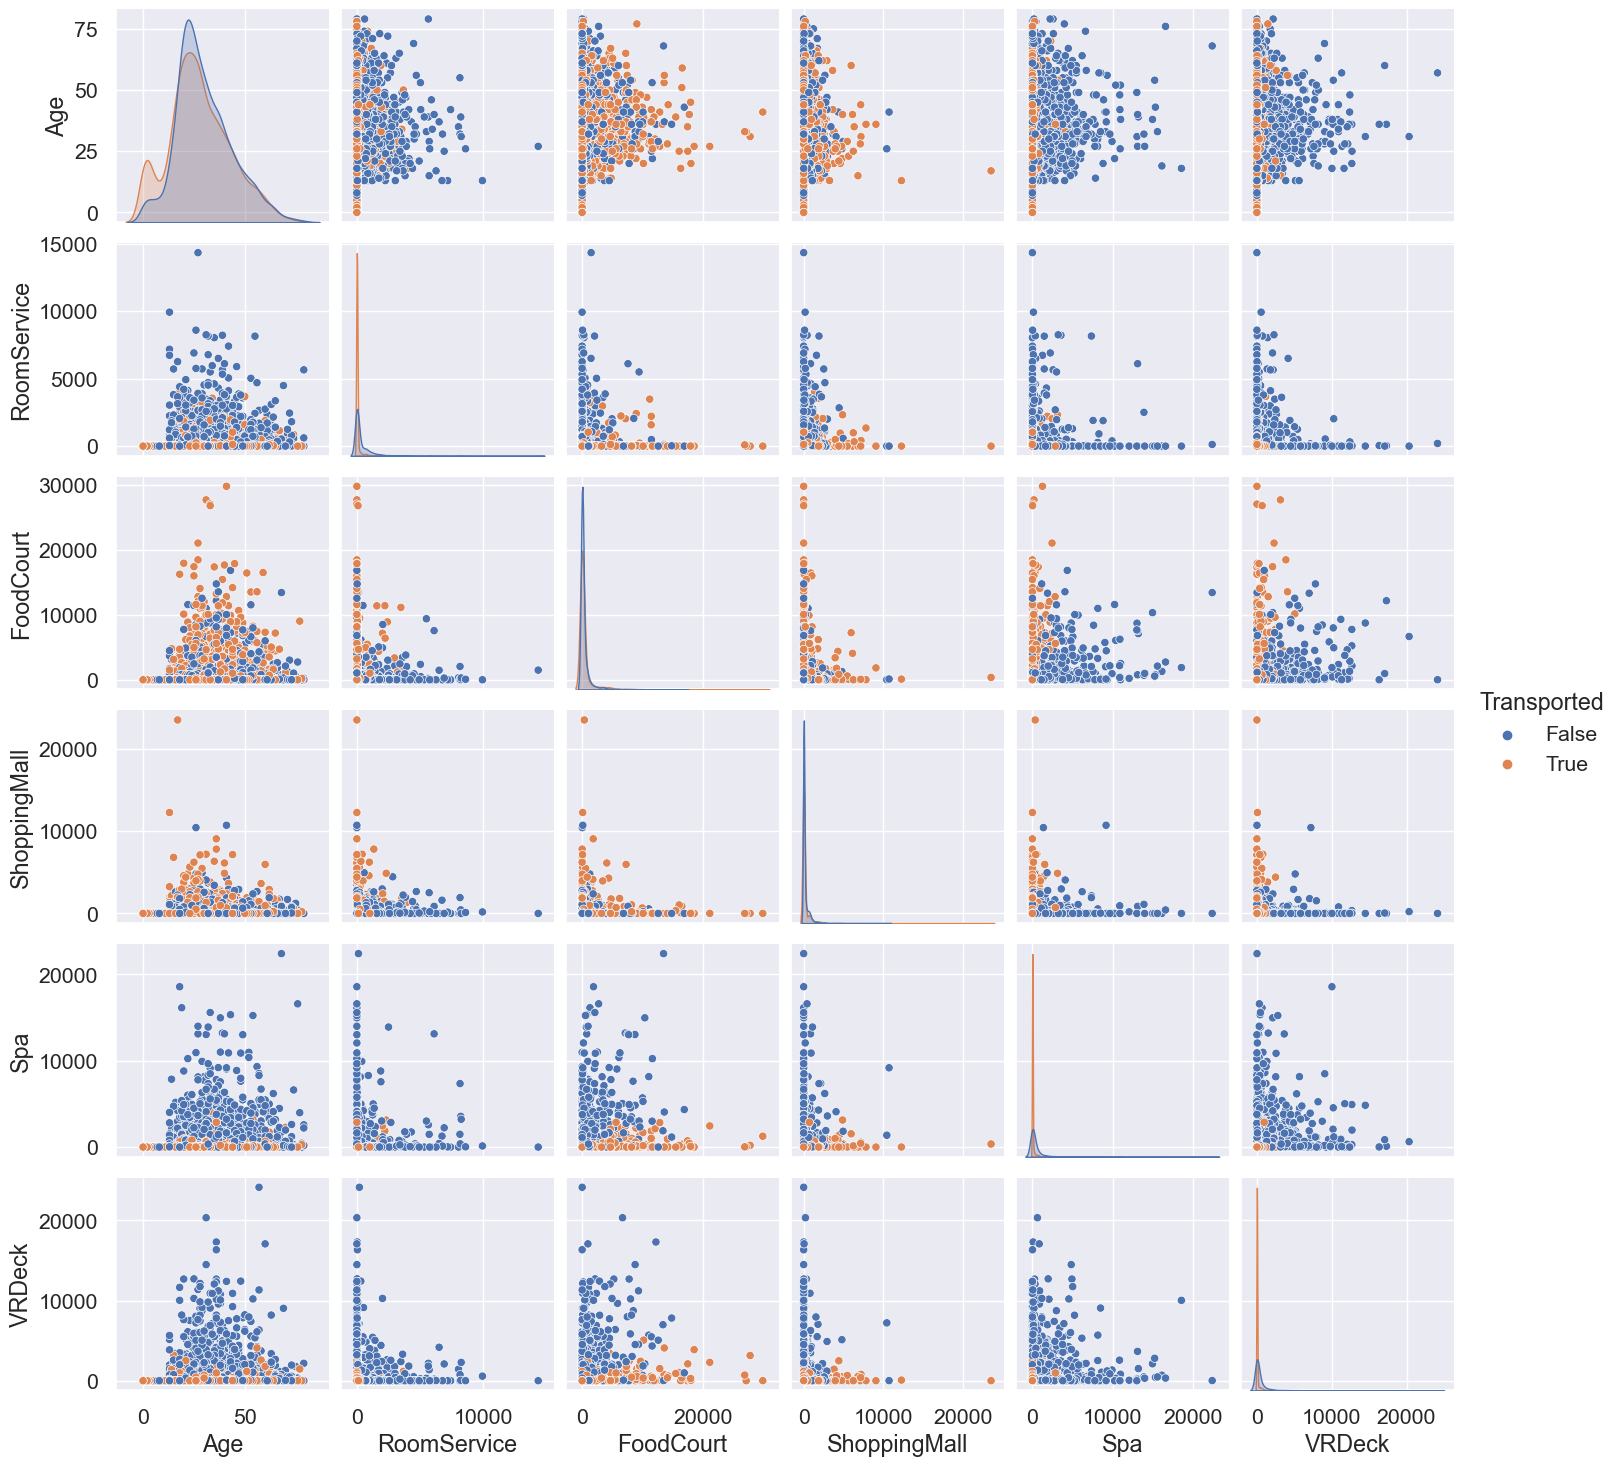

In [45]:
sns.pairplot(data=train, vars=cont_cols, hue='Transported')
plt.show()


<font size="3">**Inferences:**
1. <font size="3">The plot of Spa vs VRDeck has a good seperation between the classes. It's very clear that people who had spent less money on these were mostly Transported. 
2. <font size="3">The above statement holds true for Spa vs RoomService.
3. <font size="3">VRDeck, Spa, RoomService have a good differentiation between classes. 
4. <font size="3">We can create a new feature that tells the total expenditure in the above three features. 

<a id="3.2.3.2"></a>
#### 3.2.3.2 Violin Plots

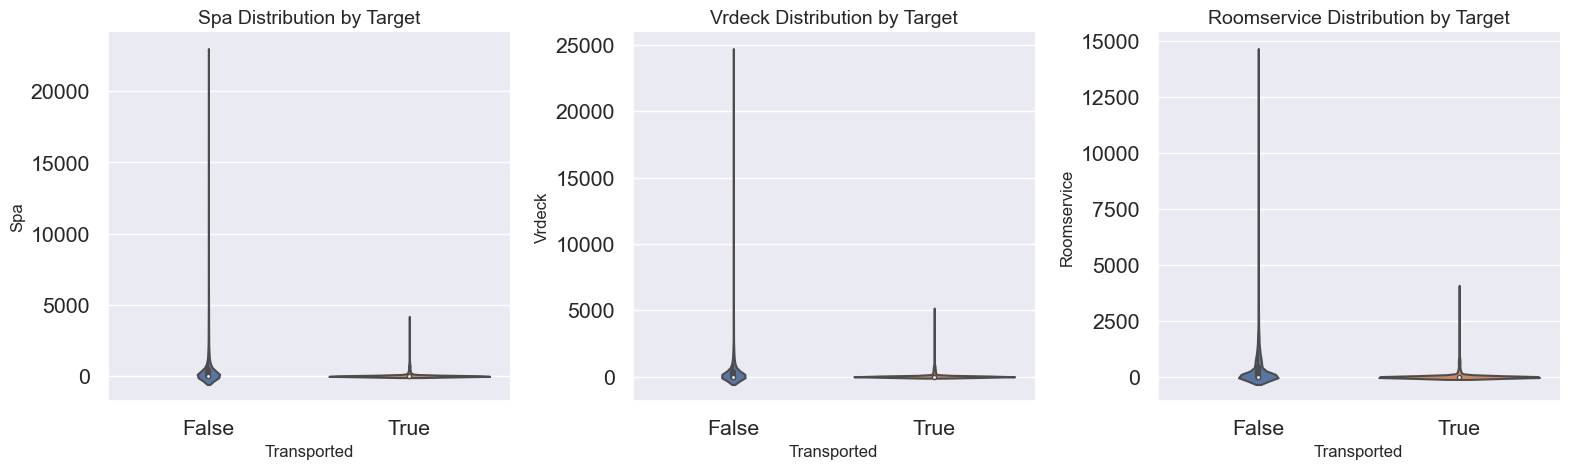

In [46]:
# Define the numerical features to plot
features=["Spa","VRDeck","RoomService"]

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(features), figsize=(16, 5))

# Loop through each feature and plot a violin plot on a separate subplot
for i, col in enumerate(features):
    sns.violinplot(x='Transported', y=col, data=train, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution by Target', fontsize=14)
    axs[i].set_xlabel('Transported', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

**Clear Confirmation from the above Violin plots that the distribution between classes are very different**

#### 3.2.3.3 t-test

1. <font size="3">The t-test is a statistical test used to determine whether the means of two groups are significantly different from each other.</font>
2. <font size="3">The t-test produces a t-value which is used to calculate a p-value. The p-value represents the probability of observing a t-value as extreme or more extreme than the one observed if the null hypothesis (no difference between means) is true.</font>
3. <font size="3">If the p-value is less than the chosen significance level (usually 0.05), then we reject the null hypothesis and conclude that there is a significant difference between the means. If the p-value is greater than the significance level, then we fail to reject the null hypothesis and conclude that there is not enough evidence to say that there is a significant difference between the means.</font>

In [47]:

def perform_ttest(train, feature_list, target):
    """
    Performs t-test on a list of independent features for a binary classification problem
    
    :param train: pandas dataframe containing the training data
    :param feature_list: list of feature names to perform t-test on
    :param target: name of the target variable (binary)
    :return: dictionary containing t-test results
    """
    ttest_results = {}
    table = PrettyTable()

    table.field_names = ['Feature', 't_stat', 'p_val']
    
    for feature in feature_list:
        group_0 = train[train[target] == 0][feature]
        group_1 = train[train[target] == 1][feature]
        
        t_stat, p_val = ttest_ind(group_0, group_1, nan_policy='omit')
        table.add_row([feature,t_stat, p_val ])
        
    return print(table)
perform_ttest(train, cont_cols, 'Transported')

+--------------+--------------------+------------------------+
|   Feature    |       t_stat       |         p_val          |
+--------------+--------------------+------------------------+
|     Age      | 6.941461666045089  | 4.165050977554494e-12  |
| RoomService  | 23.27230572812196  | 3.400493892669515e-116 |
|  FoodCourt   | -4.299893771259008 | 1.7278653407296636e-05 |
| ShoppingMall | -0.934056481671101 |   0.3503013444989256   |
|     Spa      | 20.914657362229097 | 9.275825095363414e-95  |
|    VRDeck    | 19.517825470012635 | 4.9897017399892476e-83 |
+--------------+--------------------+------------------------+


**Inferences**
1. <font size="3">All features except ShoppingMall have p-value less than 0.05, that indicates less than the significance levels and there is difference between the classes for variables.</font>

#### 3.2.3.4 ANOVA

In [48]:
from scipy.stats import f_oneway

def perform_anova(train, feature_list, target):
    """
    Performs ANOVA on a list of independent features for a binary classification problem
    
    :param train: pandas dataframe containing the training data
    :param feature_list: list of feature names to perform ANOVA on
    :param target: name of the target variable (binary)
    :return: dictionary containing ANOVA results
    """
    anova_results = {}
    table = PrettyTable()
    
    table.field_names = ['Feature', 'F-statistic', 'p-value']
    
    for feature in feature_list:
        groups = []
        for group_value in train[target].unique():
            group = train[train[target] == group_value][feature].dropna()
            groups.append(group)
        
        f_stat, p_val = f_oneway(*groups)
        table.add_row([feature, f_stat, p_val])
        
    return print(table)

perform_anova(train, cont_cols, 'Transported')

+--------------+--------------------+------------------------+
|   Feature    |    F-statistic     |        p-value         |
+--------------+--------------------+------------------------+
|     Age      | 48.18389006117339  | 4.165050977515763e-12  |
| RoomService  | 541.6002139031784  | 3.400493892685092e-116 |
|  FoodCourt   | 18.489086444112008 | 1.727865340726586e-05  |
| ShoppingMall | 0.8724615109517998 |  0.35030134449509687   |
|     Spa      | 437.4228925794437  | 9.275825095347502e-95  |
|    VRDeck    | 380.94551107787373 | 4.9897017400223456e-83 |
+--------------+--------------------+------------------------+


#### 3.2.3.5 Alternate Method to Pair Plots

1. <font size="3">If we have many features, it would be difficult to visually plot and understand all the features. So here is a method that can tell us which pair of features together are really important in the classification task</font>
2. <font size="3">Let's apply SVM just using a pair of two features and the target feature, see if it's able to do the the job better</font>

Thanks @[louiesage](http://www.kaggle.com/louiesage)for the suggestion

In [49]:
feature_pairs = list(combinations(cont_cols, 2))
table = PrettyTable()
table.field_names = ['Feature Pair', 'Accuracy']

# Fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
train_imputed = imputer.fit_transform(train[cont_cols])

for pair in feature_pairs:
    # Using the entire train data to fit, not a CV because it is time consuming
    x_temp = train_imputed[:, [cont_cols.index(pair[0]), cont_cols.index(pair[1])]]
    y_temp = train['Transported']
    model = SVC(gamma='auto')
    model.fit(x_temp, y_temp)
    y_pred = model.predict(x_temp)
    acc = accuracy_score(y_temp, y_pred)
    table.add_row([pair, acc])
table.sortby = 'Accuracy'
table.reversesort = True
print(table)

+---------------------------------+--------------------+
|           Feature Pair          |      Accuracy      |
+---------------------------------+--------------------+
|   ('RoomService', 'FoodCourt')  | 0.8149085471068676 |
|  ('FoodCourt', 'ShoppingMall')  | 0.8128379155642471 |
|      ('RoomService', 'Spa')     | 0.8076613367076958 |
|    ('RoomService', 'VRDeck')    | 0.8047854595651673 |
|     ('ShoppingMall', 'Spa')     | 0.799493845622915  |
|    ('ShoppingMall', 'VRDeck')   | 0.7968480386517888 |
|       ('FoodCourt', 'Spa')      | 0.7966179684803865 |
|        ('Spa', 'VRDeck')        | 0.7931669159093524 |
|     ('FoodCourt', 'VRDeck')     | 0.7848843897388703 |
| ('RoomService', 'ShoppingMall') | 0.7793627056252157 |
|          ('Age', 'Spa')         | 0.7378350396871046 |
|      ('Age', 'RoomService')     | 0.7302427240308293 |
|        ('Age', 'VRDeck')        | 0.7277119521454043 |
|       ('Age', 'FoodCourt')      | 0.7206948119176348 |
|     ('Age', 'ShoppingMall')  

**Inferences:**
1. <font size="3">Earlier from the pair plots, we have established that Spa, VRDeck,& RoomService are really important in the classification. Now, the above method is moore reliable than visualization because we have numbers.</font>
2. <font size="3">FoodCourt & RoomService together has really good classification ability. Perhaps, we can try to combine all the expenditure features than just combining Spa,VRDeck, & RoomService</font>
3. <font size="3">A note here is that it is our understanding of the data and the feature enable us to decide what combination makes a better feature. Since, all the top features in the table are expenditure features, it is easy to understand that creating a combined total expenditure would be a better option</font>

<a id="3.3"></a>
## 3.3 Categorical/Discrete Analysis

In [50]:
cat_features=[f for f in train.columns if f not in cont_cols+["PassengerId","Name","Transported"] and train[f].nunique()<50]
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

### 3.3.1 Target Distributions

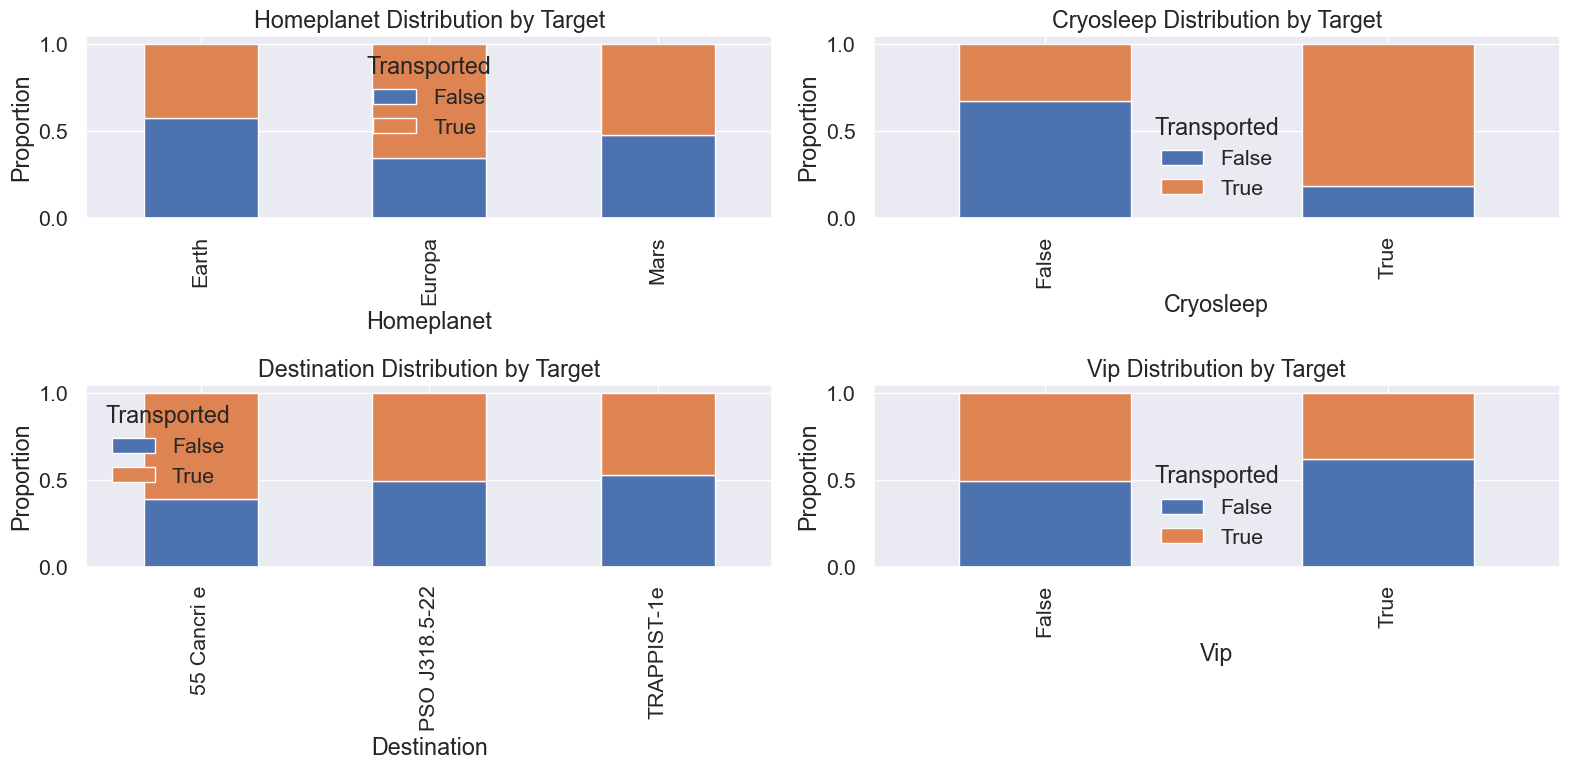

In [51]:
import matplotlib.pyplot as plt

target = 'Transported'

# Create subplots for each categorical feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Loop through each categorical feature and plot the contingency table in a subplot
for i, col in enumerate(cat_features):
    contingency_table = pd.crosstab(train[col], train[target], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f"{col.title()} Distribution by Target")
    axs[i//2, i%2].set_xlabel(col.title())
    axs[i//2, i%2].set_ylabel("Proportion")
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


**Inferences**
1. Less number of people from Earth are saved :(
2. Cryosleep has good difference in proportions, poeple who are in Cryosleep are  more likely to be Transported
3. All the categories have differences in distributions in the classes


## 3.4 Correlation Plot

In [52]:
features=[f for f in train.columns if train[f].astype!='O' and f not in ['Transported']]
corr = train[features].corr()
plt.figure(figsize = (10, 10), dpi = 300)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = sns.diverging_palette(500, 10, as_cmap=True), annot = True, annot_kws = {'size' : 7})
plt.title('Train Feature Correlation Matrix\n', fontsize = 25, weight = 'bold')
plt.show()

ValueError: could not convert string to float: 'Europa'

<font size="3"> We can see that they are correlated only to a litlle extent however, our feature engineering techniques might create highly correlated features</font>

<a id="4"></a>
# 4. Data Cleaning

<a id="4.1"></a>
## 4.1 Passenger Group & Cabin

1. **<font size="3">Passenger Group</font>**: <font size="3">Since it is mentioned in the problem statement that Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.</font>
2. **<font size="3">Cabin</font>**: <font size="3">Cabin has the format Deck/Number/Side.</font>

In [53]:
# Extract passenger Groups
train["group"]=train["PassengerId"].str[:-3].astype(int)
test["group"]=test["PassengerId"].str[:-3].astype(int)

# Extract Deck 
def deck(x):
    x=str(x)
    if x=='nan':
        return 'Missing_Deck'
    else:
        x=x.split('/')
        return x[0]
train['cabin_deck']=train["Cabin"].apply(deck)
test['cabin_deck']=test["Cabin"].apply(deck)

# Extract the cabin number
def num(x):
    x=str(x)
    if x=='nan':
        return None
    else:
        x=x.split('/')
        return int(x[1])
train['cabin_num']=train["Cabin"].apply(num)
test['cabin_num']=test["Cabin"].apply(num)

# Extract the Cabin Side
def side(x):
    x=str(x)
    if x=='nan':
        return "Missing_Side"
    else:
        x=x.split('/')
        return x[2]

train['cabin_side']=train["Cabin"].apply(side)
test['cabin_side']=test["Cabin"].apply(side)

train.drop(columns=["Cabin"],inplace=True)
test.drop(columns=["Cabin"],inplace=True)

<a id="4.2"></a>
## 4.2 Name 

In [54]:
# Extract the last names 
def name(x):
    x=str(x)
    x=x.lower()
    x=x.strip()
    x=x.split(" ")
    if len(x)>1:
        return x[-1]
    else:
        return (x[0])
# We first fill the missing names and then extract the last names
train['Name']=train['Name'].fillna("No_Name")
test['Name']=test['Name'].fillna("No_Name")
train['Last_Name']=train['Name'].apply(name)
test['Last_Name']=test['Name'].apply(name)
print(train['Last_Name'].isna().sum(),test['Last_Name'].isna().sum())

0 0


In [55]:
# Bool to Num
def bool_c(x):
    if x==True:
        return 1
    elif x==False:
        return 0
    else:
        return np.nan
train["VIP"]=train["VIP"].apply(bool_c)
test["VIP"]=test["VIP"].apply(bool_c)
train["CryoSleep"]=train["CryoSleep"].apply(bool_c)
test["CryoSleep"]=test["CryoSleep"].apply(bool_c)
train["Transported"]=train["Transported"].astype(int)

<a id="4.3"></a>
## 4.3 Handling Missing Values

<a id="4.3.1"></a>
### 4.3.1 Missing Categorical features

In [56]:
# Categorical features

miss_cat=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtype=='O']
miss_cat

['HomePlanet', 'Destination']

In [57]:
# Calculate the missing percentages for both train and test data
train_missing_pct = train[miss_cat].isnull().mean() * 100
test_missing_pct = test[miss_cat].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percentage dataframe
print(missing_pct_df)

              Train %     Test%
HomePlanet   2.312205  2.034136
Destination  2.093639  2.151040


<font size="3">Both train and test datasets have around the same missing values. For now, we can use some analysis and fill them.
There is also an option to drop the rows with all four features missing</font>

**Iterative CatBoost Imputer**: <font size="3"> Please refer to my notebook [here](https://www.kaggle.com/code/arunklenin/ps3e15-iterative-catboost-imputer-ensemble?scriptVersionId=130271409) in which I implemented this method for the first time</font>

In [58]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,cabin_deck,cabin_num,cabin_side,Last_Name
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,B,0.0,P,ofracculy
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,F,0.0,S,vines
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,A,0.0,S,susent
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,A,0.0,S,susent
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,F,1.0,S,santantines


In [59]:
for feature in miss_cat:
    train[feature].fillna("missing_"+feature,inplace=True)
    test[feature].fillna("missing_"+feature,inplace=True)
    
# Calculate the missing percentages for both train and test data
train_missing_pct = train[miss_cat].isnull().mean() * 100
test_missing_pct = test[miss_cat].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percent
print(missing_pct_df)

# cat_params={
#             'depth': 7,
#             'learning_rate': 0.1,
#             'l2_leaf_reg': 0.7,
#             'random_strength': 0.2,
#             'max_bin': 200,
#             'od_wait': 65,
#             'one_hot_max_size': 70,
#             'grow_policy': 'Depthwise',
#             'bootstrap_type': 'Bayesian',
#             'od_type': 'Iter',
#             'eval_metric': 'MultiClass',
#             'loss_function': 'MultiClass',
# }
# def store_missing_rows(df, features):
#     missing_rows = {}
    
#     for feature in features:
#         missing_rows[feature] = df[df[feature].isnull()]
    
#     return missing_rows


# def fill_missing_categorical(train,test,target, features, max_iterations=10):
    
#     df=pd.concat([train.drop(columns=[target,"PassengerId"]),test.drop(columns=['PassengerId'])],axis="rows")
#     df=df.reset_index(drop=True)
    
#     # Step 1: Store the instances with missing values in each feature
#     missing_rows = store_missing_rows(df, features)
    
#     # Step 2: Initially fill all missing values with "Missing"
#     for f in features:
#         df[f]=df[f].fillna("Missing_"+f)
# #     df[features] = df[features].fillna("Missing")
    
#     for iteration in tqdm(range(max_iterations), desc="Iterations"):
#         for feature in features:
#             # Skip features with no missing values
#             rows_miss = missing_rows[feature].index
            
#             missing_temp = df.loc[rows_miss].copy()
#             non_missing_temp = df.drop(index=rows_miss).copy()
#             missing_temp = missing_temp.drop(columns=[feature])
            
#             cat_features = [x for x in df.columns if df[x].dtype=="O" and x != feature]
            
#             # Step 3: Use the remaining features to predict missing values using Random Forests
#             X_train = non_missing_temp.drop(columns=[feature])
#             y_train = non_missing_temp[[feature]]
            
#             catboost_classifier = CatBoostClassifier(**cat_params)
#             catboost_classifier.fit(X_train, y_train, cat_features=cat_features, verbose=False)
            
#             # Step 4: Predict missing values for the feature and update all N features
#             y_pred = catboost_classifier.predict(missing_temp)
#             df.loc[rows_miss, feature] = y_pred
#     train[features] = np.array(df.iloc[:train.shape[0]][features])
#     test[features] = np.array(df.iloc[train.shape[0]:][features])
    
#     return train,test


# train ,test= fill_missing_categorical(train,test,"Transported",miss_cat,10)

             Train %  Test%
HomePlanet       0.0    0.0
Destination      0.0    0.0


<a id="4.3.2"></a>
### 4.3.2 Missing Numerical features

In [60]:
miss_cont=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtype!='O' and feature not in ['Transported']]
miss_cont

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'cabin_num']

In [61]:
# Calculate the missing percentages for both train and test data
train_missing_pct = train[miss_cont].isnull().mean() * 100
test_missing_pct = test[miss_cont].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percentage dataframe
print(missing_pct_df)

               Train %     Test%
CryoSleep     2.496261  2.174421
Age           2.059128  2.127660
VIP           2.335212  2.174421
RoomService   2.082135  1.917232
FoodCourt     2.105142  2.478373
ShoppingMall  2.392730  2.291326
Spa           2.105142  2.361468
VRDeck        2.162660  1.870470
cabin_num     2.289198  2.338087


<font size="3">Most of the features are expenditure features and my hypothesis is that if someone is in CryoSleep, it is not possible to spend money in these activities.</font>

In [62]:
# First lets fill CryoSleep, based on totdal expenditure
exp_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train["Expenditure"]=train[exp_features].sum(axis="columns")
test["Expenditure"]=test[exp_features].sum(axis="columns")

# Zero expenditure indicate that they are in CryoSleep
train['CryoSleep']=np.where(train['Expenditure']==0,1,0)
test['CryoSleep']=np.where(test['Expenditure']==0,1,0)

# Also, if they are VIPs, they probably would not choose to be in CryoSleep
train['VIP']=np.where(train['CryoSleep']==0,1,0)
test['VIP']=np.where(test['CryoSleep']==0,1,0)

train.drop(columns=["Expenditure"],inplace=True)
test.drop(columns=["Expenditure"],inplace=True)

In [63]:
for col in exp_features:
    train[col]=np.where(train["CryoSleep"]==1,0,train[col])
    test[col]=np.where(test["CryoSleep"]==1,0,test[col])    
    
# Calculate the missing percentages for both train and test data
train_missing_pct = train[miss_cont].isnull().mean() * 100
test_missing_pct = test[miss_cont].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percentage dataframe
print(missing_pct_df)

               Train %     Test%
CryoSleep     0.000000  0.000000
Age           2.059128  2.127660
VIP           0.000000  0.000000
RoomService   1.184861  1.239186
FoodCourt     1.173358  1.519757
ShoppingMall  1.150351  1.402852
Spa           1.288393  1.169044
VRDeck        1.173358  0.958616
cabin_num     2.289198  2.338087


<font size="3">Now we have filled almost many of them, the rest can be filled with KNN Imputer</font>

In [64]:
miss_cont=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtype!='O' and feature not in ['Transported']]
miss_cont
imputer=KNNImputer(n_neighbors=5)
train[miss_cont]=imputer.fit_transform(train[miss_cont])
test[miss_cont]=imputer.transform(test[miss_cont])

# Calculate the missing percentages for both train and test data
train_missing_pct = train[miss_cont].isnull().mean() * 100
test_missing_pct = test[miss_cont].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percentage dataframe
print(missing_pct_df)

              Train %  Test%
Age               0.0    0.0
RoomService       0.0    0.0
FoodCourt         0.0    0.0
ShoppingMall      0.0    0.0
Spa               0.0    0.0
VRDeck            0.0    0.0
cabin_num         0.0    0.0


In [65]:
# cb_params = {
#             'iterations': 500,
#             'depth': 6,
#             'learning_rate': 0.02,
#             'l2_leaf_reg': 0.5,
#             'random_strength': 0.2,
#             'max_bin': 150,
#             'od_wait': 80,
#             'one_hot_max_size': 70,
#             'grow_policy': 'Depthwise',
#             'bootstrap_type': 'Bayesian',
#             'od_type': 'IncToDec',
#             'eval_metric': 'RMSE',
#             'loss_function': 'RMSE',
#             'random_state': 42,
#         }
# def rmse(y1,y2):
#     return(np.sqrt(mean_squared_error(y1,y2)))

# def fill_missing_numerical(train,test,target, features, max_iterations=10):
    
#     df=pd.concat([train.drop(columns=[target,"PassengerId"]),test.drop(columns="PassengerId")],axis="rows")
#     df=df.reset_index(drop=True)
    
#     # Step 1: Store the instances with missing values in each feature
#     missing_rows = store_missing_rows(df, features)
    
#     # Step 2: Initially fill all missing values with "Missing"
#     for f in features:
#         df[f]=df[f].fillna(df[f].mean())
    
#     cat_features=[f for f in df.columns if df[f].dtype=="O"]
#     dictionary = {feature: [] for feature in features}
    
#     for iteration in tqdm(range(max_iterations), desc="Iterations"):
#         for feature in features:
#             # Skip features with no missing values
#             rows_miss = missing_rows[feature].index
            
#             missing_temp = df.loc[rows_miss].copy()
#             non_missing_temp = df.drop(index=rows_miss).copy()
#             y_pred_prev=missing_temp[feature]
#             missing_temp = missing_temp.drop(columns=[feature])
            
            
#             # Step 3: Use the remaining features to predict missing values using Random Forests
#             X_train = non_missing_temp.drop(columns=[feature])
#             y_train = non_missing_temp[[feature]]
            
#             catboost_classifier = CatBoostRegressor(**cb_params)
#             catboost_classifier.fit(X_train, y_train,cat_features=cat_features, verbose=False)
            
#             # Step 4: Predict missing values for the feature and update all N features
#             y_pred = catboost_classifier.predict(missing_temp)
#             df.loc[rows_miss, feature] = y_pred
#             error_minimize=rmse(y_pred,y_pred_prev)
#             dictionary[feature].append(error_minimize)  # Append the error_minimize value

#     for feature, values in dictionary.items():
#         iterations = range(1, len(values) + 1)  # x-axis values (iterations)
#         plt.plot(iterations, values, label=feature)  # plot the values
#         plt.xlabel('Iterations')
#         plt.ylabel('RMSE')
#         plt.title('Minimization of RMSE with iterations')
#         plt.legend()
#         plt.show()
#     train[features] = np.array(df.iloc[:train.shape[0]][features])
#     test[features] = np.array(df.iloc[train.shape[0]:][features])

#     return train,test


# train,test = fill_missing_numerical(train,test,"Transported",miss_cont,20)

<a id="5"></a>
# 5. Feature Engineering

<font size="3">We have already seen in EDA that VRDeck, Spa, RoomService have good distisgunshing capability. Let us combine the features to create an expenditure feature in these categories and also the total expenditure</font>

In [66]:
train["expenditure"]=train["VRDeck"]+train["Spa"]+train["RoomService"]
test["expenditure"]=test["VRDeck"]+test["Spa"]+test["RoomService"]

# train["total_exp"]=train["VRDeck"]+train["Spa"]+train["RoomService"]+train['FoodCourt']+train['ShoppingMall']
# test["total_exp"]=test["VRDeck"]+test["Spa"]+test["RoomService"]+train['FoodCourt']+train['ShoppingMall']

In [67]:
num_feat=[f for f in train.columns if train[f].dtype!="O" and train[f].nunique()>10] # The rest are discrete/categorical
num_feat

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'group',
 'cabin_num',
 'expenditure']

<a id="5.1.1"></a>
# 5.1 Numerical Feature Transformations

<font size="3">We're going to see what transformation works better for each feature and select them, the idea is to compress the data. There could be situations where you will have to stretch the data. These are the methods applied:</font>
<font size="3">
1. <font size="3"> **Log Transformation**</font>: <font size="3">This transformation involves taking the logarithm of each data point. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                            y = log(x)

2. <font size="3">**Square Root Transformation**</font>: <font size="3">This transformation involves taking the square root of each data point. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                            y = sqrt(x)

3. <font size="3">**Box-Cox Transformation**</font>: <font size="3">This transformation is a family of power transformations that includes the log and square root transformations as special cases. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                            y = [(x^lambda) - 1] / lambda if lambda != 0
                            y = log(x) if lambda = 0

4. <font size="3">**Yeo-Johnson Transformation**</font>: <font size="3">This transformation is similar to the Box-Cox transformation, but it can be applied to both positive and negative values. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                            y = [(|x|^lambda) - 1] / lambda if x >= 0, lambda != 0
                            y = log(|x|) if x >= 0, lambda = 0
                            y = -[(|x|^lambda) - 1] / lambda if x < 0, lambda != 2
                            y = -log(|x|) if x < 0, lambda = 2

5. <font size="3">**Power Transformation**</font>: <font size="3">This transformation involves raising each data point to a power. It is useful when the data is highly skewed and the variance increases with the mean. The power can be any value, and is often determined using statistical methods such as the Box-Cox or Yeo-Johnson transformations.</font>
                            y = [(x^lambda) - 1] / lambda if method = "box-cox" and lambda != 0
                            y = log(x) if method = "box-cox" and lambda = 0
                            y = [(x + 1)^lambda - 1] / lambda if method = "yeo-johnson" and x >= 0, lambda != 0
                            y = log(x + 1) if method = "yeo-johnson" and x >= 0, lambda = 0
                            y = [-(|x| + 1)^lambda - 1] / lambda if method = "yeo-johnson" and x < 0, lambda != 2
                            y = -log(|x| + 1) if method = "yeo-johnson" and x < 0, lambda = 2

<font size="3">Let's also do a grouped clustering follwed by a WOE encoding on these numerical features</font>

In [68]:
# Below are the functions to decide the decision boundaries in order to maximize Accuracy/ f1-score
def f1_cutoff(precisions, recalls, thresholds):
    a=precisions*recalls/(recalls+precisions)
    b=sorted(zip(a,thresholds))
    return b[-1][1]
def acc_cutoff(y_valid, y_pred_valid):
    y_valid=np.array(y_valid)
    y_pred_valid=np.array(y_pred_valid)
    fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)
    pred_valid = pd.DataFrame({'label': y_pred_valid})
    thresholds = np.array(threshold)
    pred_labels = (pred_valid['label'].values > thresholds[:, None]).astype(int)
    acc_scores = (pred_labels == y_valid).mean(axis=1)
    acc_df = pd.DataFrame({'threshold': threshold, 'test_acc': acc_scores})
    acc_df.sort_values(by='test_acc', ascending=False, inplace=True)
    cutoff = acc_df.iloc[0, 0]
    return cutoff
    
sc=MinMaxScaler()
unimportant_features=[]
table = PrettyTable()
dt_params= {'min_samples_split': 80, 'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'absolute_error'}

table.field_names = ['Original Feature', 'Original Accuracy(CV-TRAIN)', 'Transformed Feature', 'Tranformed Accuracy(CV-TRAIN)']
for col in num_feat:
    
    # Log Transformation after MinMax Scaling(keeps data between 0 and 1)
    train["log_"+col]=np.log1p(sc.fit_transform(train[[col]]))
    test["log_"+col]=np.log1p(sc.transform(test[[col]]))
    
    # Square Root Transformation
    train["sqrt_"+col]=np.sqrt(sc.fit_transform(train[[col]]))
    test["sqrt_"+col]=np.sqrt(sc.transform(test[[col]]))
    
    # Box-Cox transformation
    transformer = PowerTransformer(method='box-cox')
    train["bx_cx_"+col] = transformer.fit_transform(sc.fit_transform(train[[col]])+1) # adjusted to make it +ve
    test["bx_cx_"+col] = transformer.transform(sc.transform(test[[col]])+1)
    
    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    train["y_J_"+col] = transformer.fit_transform(train[[col]])
    test["y_J_"+col] = transformer.transform(test[[col]])
    
    # Power transformation, 0.25
    power_transform = lambda x: np.power(x, 0.25) 
    transformer = FunctionTransformer(power_transform)
    train["pow_"+col] = transformer.fit_transform(sc.fit_transform(train[[col]]))
    test["pow_"+col] = transformer.transform(sc.transform(test[[col]]))
    
    # Power transformation, 0.1
    power_transform = lambda x: np.power(x, 0.1) 
    transformer = FunctionTransformer(power_transform)
    train["pow2_"+col] = transformer.fit_transform(sc.fit_transform(train[[col]]))
    test["pow2_"+col] = transformer.transform(sc.transform(test[[col]]))
    
    # log to power transformation
    train["log_pow2"+col]=np.log1p(train["pow2_"+col])
    test["log_pow2"+col]=np.log1p(test["pow2_"+col])
    
    temp_cols=[col,"log_"+col,"sqrt_"+col, "bx_cx_"+col,"y_J_"+col ,"pow_"+col,"pow2_"+col,"log_pow2"+col ]
    
    # Fill na becaue, it would be Nan if the vaues are negative and a transformation applied on it
    train[temp_cols]=train[temp_cols].fillna(0)
    test[temp_cols]=test[temp_cols].fillna(0)
    
    #Apply PCA on  the features and compute an additional column
    pca=TruncatedSVD(n_components=1)
    x_pca_train=pca.fit_transform(train[temp_cols])
    x_pca_test=pca.transform(test[temp_cols])
    x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
    x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
    temp_cols.append(col+"_pca_comb")
    #print(temp_cols)
    
    train=pd.concat([train,x_pca_train],axis='columns')
    test=pd.concat([test,x_pca_test],axis='columns')
    
    # See which transformation along with the original is giving you the best univariate fit with target
    kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
    ACC=[]
    
    for f in temp_cols:
        X=train[[f]].values
        y=train["Transported"].values
        
        acc=[]
        for train_idx, val_idx in kf.split(X,y):
            X_train,y_train=X[train_idx],y[train_idx]
            x_val,y_val=X[val_idx],y[val_idx]
            
            model=LogisticRegression()
#             model=DecisionTreeRegressor(**dt_params)
            model.fit(X_train,y_train)
            y_pred=model.predict_proba(x_val)[:,1]
            precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
#             cutoff=f1_cutoff(precisions,recalls, thresholds)
            cutoff=acc_cutoff(y_val,y_pred)
#             print(cutoff)
            predicted =pd.DataFrame()
            predicted["Transported"] = y_pred
            y_pred=np.where(predicted["Transported"]>float(cutoff),1,0)
            acc.append(accuracy_score(y_val,y_pred))
        ACC.append((f,np.mean(acc)))
        if f==col:
            orig_acc=np.mean(acc)
    best_col, best_acc=sorted(ACC, key=lambda x:x[1], reverse=True)[0]
    
    cols_to_drop = [f for f in temp_cols if  f!= best_col]
#     print(cols_to_drop)
    final_selection=[f for f in temp_cols if f not in cols_to_drop]
    if cols_to_drop:
        unimportant_features=unimportant_features+cols_to_drop
    table.add_row([col,orig_acc,best_col ,best_acc])
print(table)    

+------------------+-----------------------------+---------------------+-------------------------------+
| Original Feature | Original Accuracy(CV-TRAIN) | Transformed Feature | Tranformed Accuracy(CV-TRAIN) |
+------------------+-----------------------------+---------------------+-------------------------------+
|       Age        |      0.5485979392352155     |         Age         |       0.5485979392352155      |
|   RoomService    |      0.6715703080565586     |     RoomService     |       0.6715703080565586      |
|    FoodCourt     |      0.5142101503908576     |    sqrt_FoodCourt   |       0.6177379204528921      |
|   ShoppingMall   |      0.509031519913231      |  sqrt_ShoppingMall  |       0.6311937356983188      |
|       Spa        |      0.6730687935663928     |         Spa         |       0.6730687935663928      |
|      VRDeck      |      0.6638673068529026     |        VRDeck       |       0.6638673068529026      |
|      group       |      0.5388243852757166     |     

<a id="5.2"></a>
# 5.2 Categorical Features

<font size="3">For each categorical variable, perform the following encoding techniques:</font>
1. <font size="3">**Count/Frequency Encoding**</font>: <font size="3">Count the number of occurrences of each category and replace the category with its log count.</font>
2. <font size="3">**Count Labeling**</font>: <font size="3">Assign a label to each category based on its count, with higher counts receiving higher labels.</font>
3. <font size="3"> **WOE Binning**</font>: <font size="3">Calculate the Weight of Evidence (WOE) for each category based on the target variable, where higher WOE values indicate a higher likelihood of the target variable being 1</font>
4. <font size="3"> **Target-Guided Mean Encoding**</font>: <font size="3">Rank the categories based on the mean of target column across each category</font>
5. <font size="3"> **Group Clustering**</font>: <font size="3">All the features created from the above mentioned encdoing techniques will be grouped and clustered followed by a Log transformation of Target-mean across clusters</font>
6. <font size="3"> **One-Hot Encoding**</font>: <font size="3">Instead of applying OHE on individual features, OHE will be applied on the clusters created from all encoded features</font>

<font size="3"> Finally, the encoding technique will be selected based on their Accuracy CV performance on single feature model</font>

In [69]:
cat_features=[*set([feature for feature in train.columns if train[feature].nunique()<=10 or train[feature].dtype=='O'])-set(["PassengerId","Transported","VIP","CryoSleep"])]
train[cat_features].nunique()

HomePlanet        4
cabin_side        3
Name           8474
Last_Name      2218
cabin_deck        9
Destination       4
dtype: int64

# 5.3 TFIDF-PCA (Text Transformation)

<font size="3">*Name* and *Last_Name* has a lot of categies, so let me first handle them sing some text transformation techniques. If this doesn't work, I will drop this column<font>

<font size="3">Applied **TFIDF** Text transformation creating 1000 vectors and then applied **PCA** to reduce it to 10 columns</font>

In [70]:
def tf_idf(train, test, column,n,p):
    vectorizer=TfidfVectorizer(max_features=n)
    vectors_train=vectorizer.fit_transform(train[column])
    vectors_test=vectorizer.transform(test[column])
    
    svd=TruncatedSVD(p)
    x_pca_train=svd.fit_transform(vectors_train)
    x_pca_test=svd.transform(vectors_test)
    tfidf_df_train=pd.DataFrame(x_pca_train)
    tfidf_df_test=pd.DataFrame(x_pca_test)

    
    cols=[(column+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
    tfidf_df_train.columns=cols
    tfidf_df_test.columns=cols
    train=pd.concat([train,tfidf_df_train], axis="columns")
    test=pd.concat([test,tfidf_df_test], axis="columns")
    
    return (train, test)

(train,test)=tf_idf(train,test,"Last_Name",1000,5)
train.drop(columns=["Name","Last_Name"], inplace=True)
test.drop(columns=["Name","Last_Name"], inplace=True)

# 5.4 Encoding Techniques

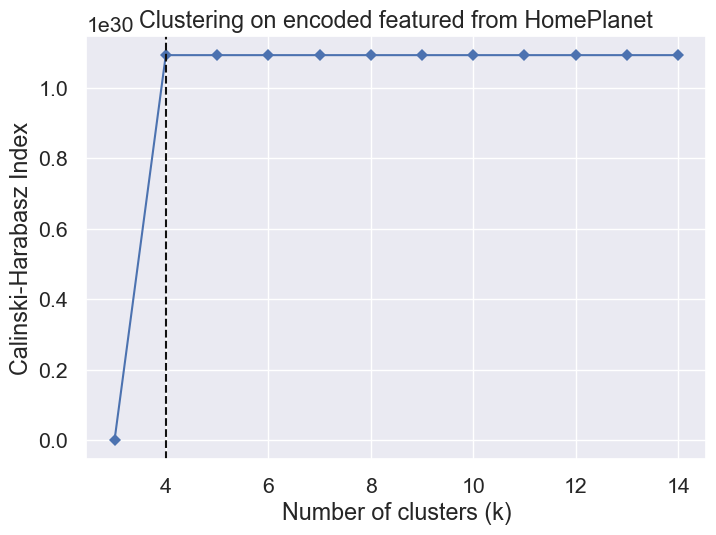

4


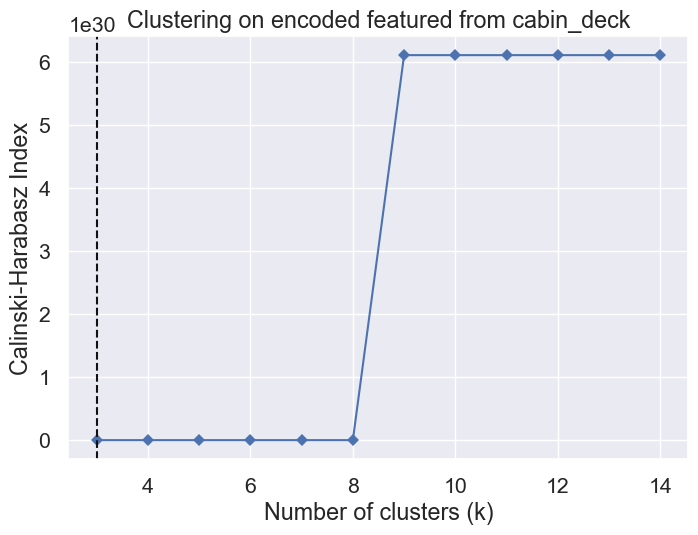

3


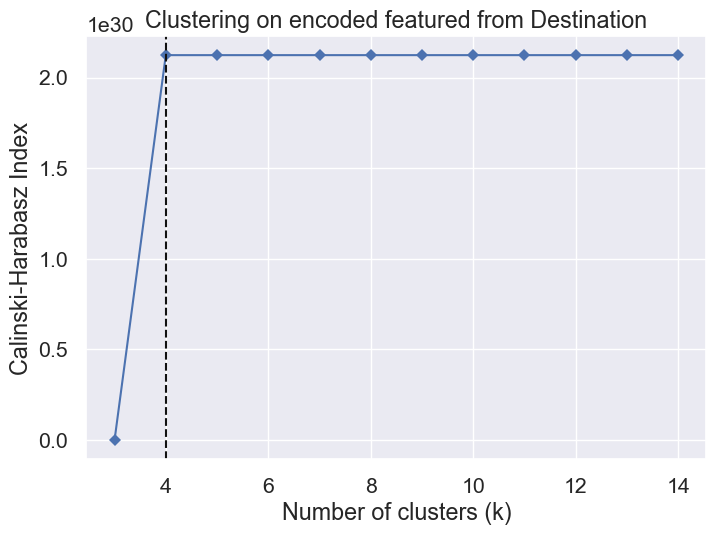

4


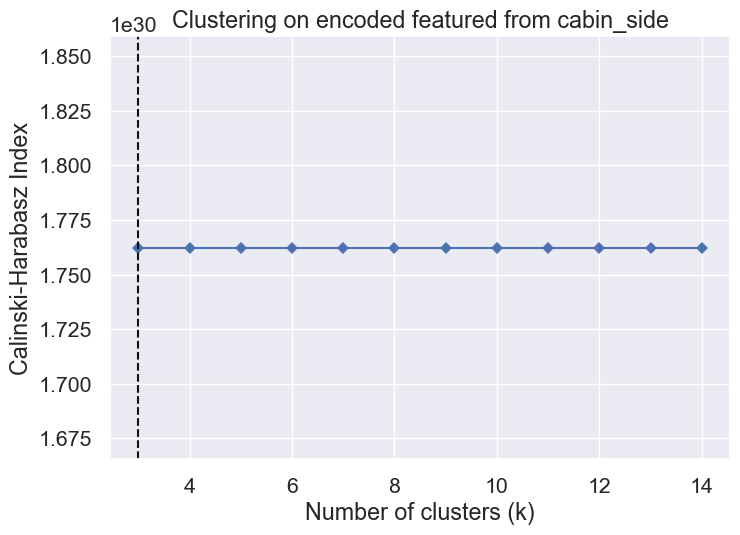

3
+-------------+--------------------+------------------------------------+
|   Feature   |  Encoded Feature   | Accuracy (CV)- Logistic regression |
+-------------+--------------------+------------------------------------+
|  HomePlanet | HomePlanet_target  |         0.5866760578283932         |
|  cabin_deck | cabin_deck_target  |         0.5826493657659089         |
| Destination | Destination_target |         0.5476811766728833         |
|  cabin_side | cabin_side_target  |         0.552510217848498          |
+-------------+--------------------+------------------------------------+


In [71]:
cat_features=['HomePlanet', 'cabin_deck', 'Destination', 'cabin_side']
table = PrettyTable()
table.field_names = ['Feature', 'Encoded Feature', "Accuracy (CV)- Logistic regression"]

def OHE(train,test,cols,target):
    combined = pd.concat([train, test], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.drop(col, axis=1)
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train)]
    test_ohe = combined[len(train):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    
    return train_ohe, test_ohe

for feature in cat_features:
    ## Target Guided Mean --Data Leakage Possible
    
    cat_labels=train.groupby([feature])['Transported'].mean().sort_values().index
    cat_labels2={k:i for i,k in enumerate(cat_labels,0)}
    train[feature+"_target"]=train[feature].map(cat_labels2)
    test[feature+"_target"]=test[feature].map(cat_labels2)
    
    ## Count Encoding
    
    dic=train[feature].value_counts().to_dict()
    train[feature+"_count"]=np.log1p(train[feature].map(dic))
    test[feature+"_count"]=np.log1p(test[feature].map(dic))

    
    ## Count Labeling
    
    dic2=train[feature].value_counts().to_dict()
    list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
    # list1=np.arange(len(dic2.values())) # Higher rank for low count
    dic3=dict(zip(list(dic2.keys()),list1))
    train[feature+"_count_label"]=train[feature].replace(dic3)
    test[feature+"_count_label"]=test[feature].replace(dic3)

    
    ## WOE Binning
    cat_labels=np.log1p(train.groupby([feature])['Transported'].sum()/(train.groupby([feature])['Transported'].count()-train.groupby([feature])['Transported'].sum()))#.sort_values().index
    cat_labels2=cat_labels.to_dict()
    train[feature+"_WOE"]=train[feature].map(cat_labels2)
    test[feature+"_WOE"]=test[feature].map(cat_labels2)
    
    
    temp_cols=[feature+"_target", feature+"_count", feature+"_count_label",feature+"_WOE"]
    
    
    # It is possible to have NaN values in the test data when new categories are seen
    imputer=KNNImputer(n_neighbors=5)
    train[temp_cols]=imputer.fit_transform(train[temp_cols])
    test[temp_cols]=imputer.transform(test[temp_cols])
    
    
    if train[feature].dtype!="O":
        temp_cols.append(feature)
    else:
        train.drop(columns=[feature],inplace=True)
        test.drop(columns=[feature],inplace=True)
    # Also, doing a group clustering on all encoding types and an additional one-hot on the clusters
    
    temp_train=train[temp_cols]
    temp_test=test[temp_cols]
    
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()


    # Initialize the KElbowVisualizer with the KMeans model and desired range of clusters
    visualizer = KElbowVisualizer(model, k=(3, 15), metric='calinski_harabasz', timings=False)

    # Fit the visualizer to the data
    visualizer.fit(np.array(temp_train))

    ideal_clusters = visualizer.elbow_value_
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Calinski-Harabasz Index')
    plt.title("Clustering on encoded featured from "+feature)
    plt.show()
    print(ideal_clusters)
    if ideal_clusters is not None:
        
        kmeans = KMeans(n_clusters=ideal_clusters)
        kmeans.fit(np.array(temp_train))
        labels_train = kmeans.labels_

        train[feature+'_cat_cluster_WOE'] = labels_train
        test[feature+'_cat_cluster_WOE'] = kmeans.predict(np.array(temp_test))

        train[feature+'_cat_OHE_cluster']=feature+"_OHE_"+train[feature+'_cat_cluster_WOE'].astype(str)
        test[feature+'_cat_OHE_cluster']=feature+"_OHE_"+test[feature+'_cat_cluster_WOE'].astype(str)

        train, test=OHE(train,test, [feature+'_cat_OHE_cluster'],"Transported")

        cat_labels=cat_labels=np.log1p(train.groupby([feature+'_cat_cluster_WOE'])['Transported'].mean())
        cat_labels2=cat_labels.to_dict()
        train[feature+'_cat_cluster_WOE']=train[feature+'_cat_cluster_WOE'].map(cat_labels2)
        test[feature+'_cat_cluster_WOE']=test[feature+'_cat_cluster_WOE'].map(cat_labels2)
        
        temp_cols=temp_cols+[feature+'_cat_cluster_WOE']
    else:
        print("No good clusters were found, skipped without clustering and OHE")
        

    
    
    
    # See which transformation along with the original is giving you the best univariate fit with target
    skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    accuaries=[]
    
    for f in temp_cols:
        X=train[[f]].values
        y=train["Transported"].values
        
        acc=[]
        for train_idx, val_idx in skf.split(X,y):
            X_train,y_train=X[train_idx],y[train_idx]
            x_val,y_val=X[val_idx],y[val_idx]
            
            model=LogisticRegression()
            model.fit(X_train,y_train)
            y_pred=model.predict_proba(x_val)[:,1]
            precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
#             cutoff=f1_cutoff(precisions,recalls, thresholds)
            cutoff=acc_cutoff(y_val,y_pred)
#             print(cutoff)
            predicted =pd.DataFrame()
            predicted["Transported"] = y_pred
            y_pred=np.where(predicted["Transported"]>float(cutoff),1,0)
            acc.append(accuracy_score(y_val,y_pred))
        accuaries.append((f,np.mean(acc)))
    best_col, best_acc=sorted(accuaries, key=lambda x:x[1], reverse=True)[0]
    
    # check correlation between best_col and other columns and drop if correlation >0.75
    corr = train[temp_cols].corr(method='pearson')
    corr_with_best_col = corr[best_col]
    cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.75 and f != best_col]
    final_selection=[f for f in temp_cols if f not in cols_to_drop]
    if cols_to_drop:
        train = train.drop(columns=cols_to_drop)
        test = test.drop(columns=cols_to_drop)
    table.add_row([feature,best_col ,best_acc])
print(table)

<font size="3"> No column with WOE Encoding has been selected</font>

<a id="5.3"></a>
## 5.5 Clustering-One Hot Transformation

<font size="3">Let's take the unimportant feartures we created using transformations and use them to create clusters followed by a one hot encoding on them. We wil apply this on each subset of original features</font>

['log_Age', 'sqrt_Age', 'bx_cx_Age', 'y_J_Age', 'pow_Age', 'pow2_Age', 'log_pow2Age', 'Age_pca_comb']


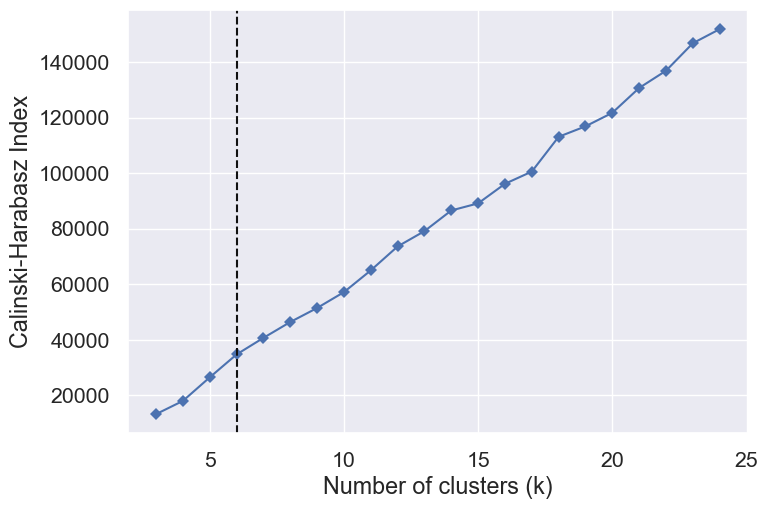

['log_RoomService', 'sqrt_RoomService', 'bx_cx_RoomService', 'y_J_RoomService', 'pow_RoomService', 'pow2_RoomService', 'log_pow2RoomService', 'RoomService_pca_comb']


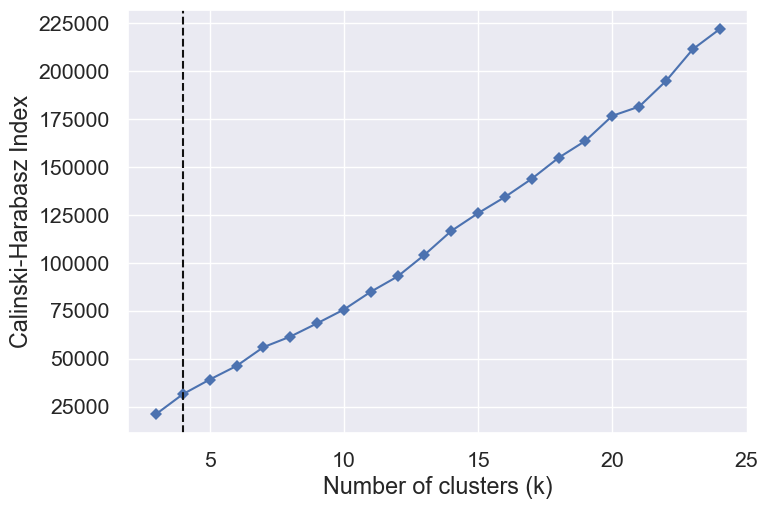

['FoodCourt', 'log_FoodCourt', 'bx_cx_FoodCourt', 'y_J_FoodCourt', 'pow_FoodCourt', 'pow2_FoodCourt', 'log_pow2FoodCourt', 'FoodCourt_pca_comb']


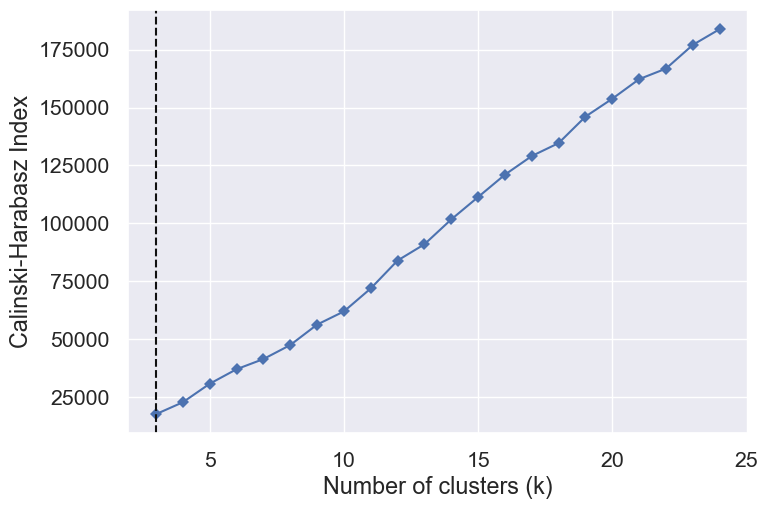

['ShoppingMall', 'log_ShoppingMall', 'bx_cx_ShoppingMall', 'y_J_ShoppingMall', 'pow_ShoppingMall', 'pow2_ShoppingMall', 'log_pow2ShoppingMall', 'ShoppingMall_pca_comb']


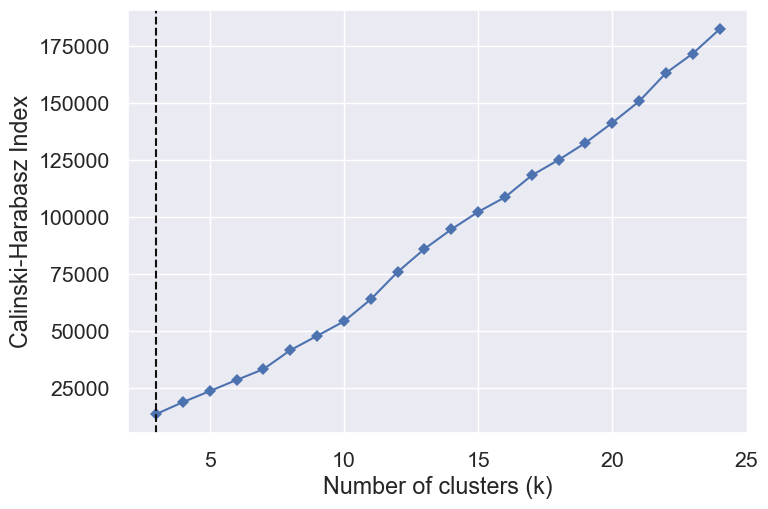

['log_Spa', 'sqrt_Spa', 'bx_cx_Spa', 'y_J_Spa', 'pow_Spa', 'pow2_Spa', 'log_pow2Spa', 'Spa_pca_comb']


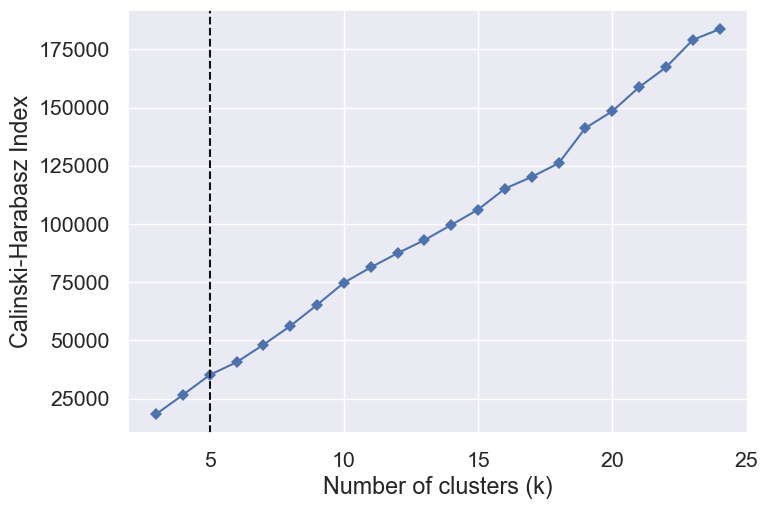

['log_VRDeck', 'sqrt_VRDeck', 'bx_cx_VRDeck', 'y_J_VRDeck', 'pow_VRDeck', 'pow2_VRDeck', 'log_pow2VRDeck', 'VRDeck_pca_comb']


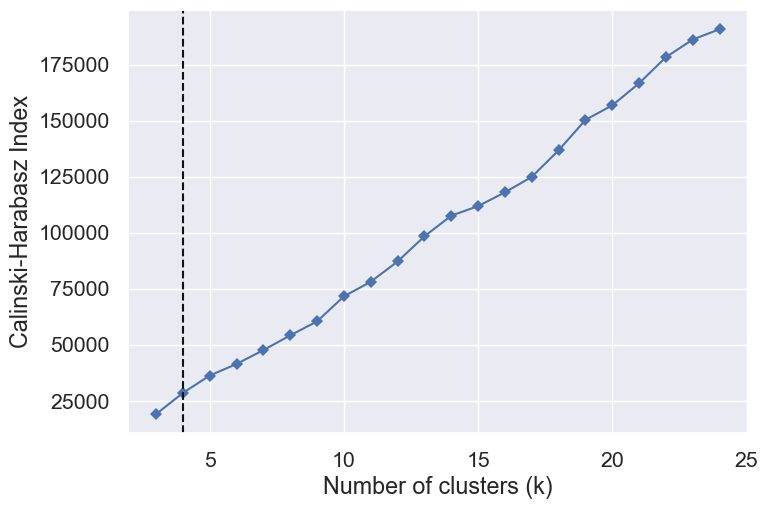

['log_group', 'sqrt_group', 'bx_cx_group', 'y_J_group', 'pow_group', 'pow2_group', 'log_pow2group', 'group_pca_comb']


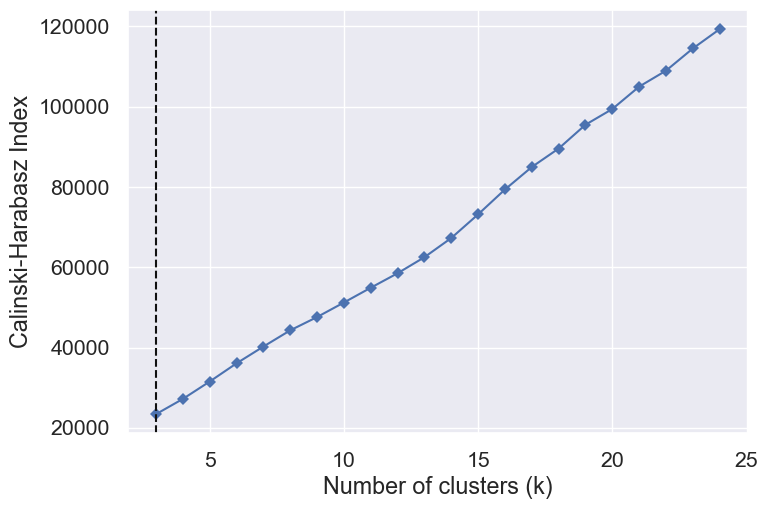

['log_cabin_num', 'sqrt_cabin_num', 'bx_cx_cabin_num', 'y_J_cabin_num', 'pow_cabin_num', 'pow2_cabin_num', 'log_pow2cabin_num', 'cabin_num_pca_comb']


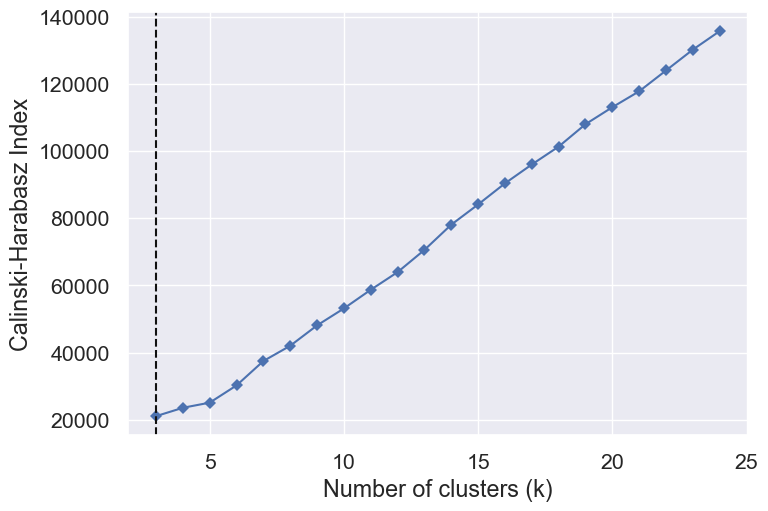

['log_expenditure', 'sqrt_expenditure', 'bx_cx_expenditure', 'y_J_expenditure', 'pow_expenditure', 'pow2_expenditure', 'log_pow2expenditure', 'expenditure_pca_comb']


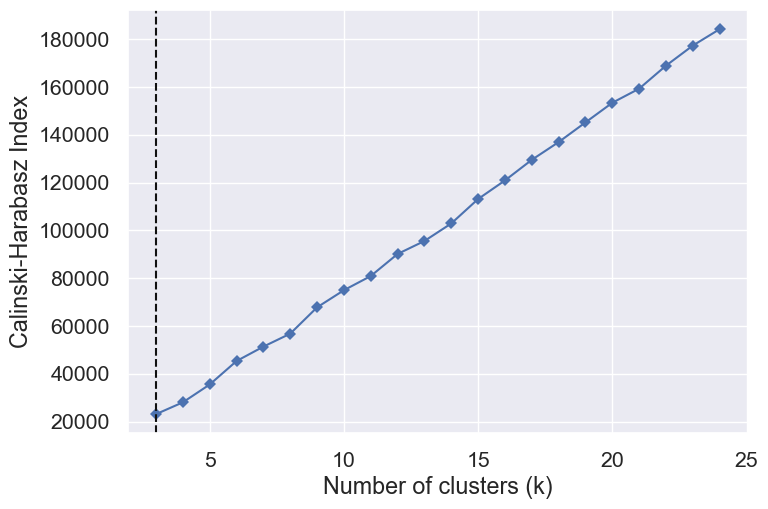

+--------------------------------+--------------------+
|      Cluster WOE Feature       |   MAE(CV-TRAIN)    |
+--------------------------------+--------------------+
|     Age_unimp_cluster_WOE      | 0.5392811131833393 |
| RoomService_unimp_cluster_WOE  | 0.6712250836607012 |
|  FoodCourt_unimp_cluster_WOE   | 0.6103778950570744 |
| ShoppingMall_unimp_cluster_WOE | 0.6192296601986694 |
|     Spa_unimp_cluster_WOE      | 0.671688292792614  |
|    VRDeck_unimp_cluster_WOE    | 0.6635222147269288 |
|    group_unimp_cluster_WOE     | 0.5229505442905704 |
|  cabin_num_unimp_cluster_WOE   | 0.5273206089705436 |
| expenditure_unimp_cluster_WOE  | 0.758655741174292  |
+--------------------------------+--------------------+


In [72]:
table = PrettyTable()
table.field_names = ['Cluster WOE Feature', 'MAE(CV-TRAIN)']
for col in num_feat:
    sub_set=[f for f in unimportant_features if col in f]
    print(sub_set)
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()


    # Initialize the KElbowVisualizer with the KMeans model and desired range of clusters
    visualizer = KElbowVisualizer(model, k=(3, 25), metric='calinski_harabasz', timings=False)

    # Fit the visualizer to the data
    visualizer.fit(np.array(temp_train))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Calinski-Harabasz Index')
    plt.show()

    ideal_clusters = visualizer.elbow_value_
    if ideal_clusters is None:
        ideal_clusters=25

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=ideal_clusters)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+'_OHE_cluster'] = labels_train
    test[col+'_OHE_cluster'] = kmeans.predict(np.array(temp_test))
    # Also, making a copy to do mean encoding followed by a log transformation
    
    train[col+"_unimp_cluster_WOE"]=train[col+'_OHE_cluster']
    test[col+"_unimp_cluster_WOE"]=test[col+'_OHE_cluster'] 
    cat_labels=cat_labels=np.log1p(train.groupby([col+"_unimp_cluster_WOE"])['Transported'].mean())
    cat_labels2=cat_labels.to_dict()
    train[col+"_unimp_cluster_WOE"]=train[col+"_unimp_cluster_WOE"].map(cat_labels2)
    test[col+"_unimp_cluster_WOE"]=test[col+"_unimp_cluster_WOE"].map(cat_labels2)

    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train["Transported"].values

    ACC=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]

        model=LogisticRegression()
        model.fit(X_train,y_train)
        y_pred=model.predict_proba(x_val)[:,1]
        precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
#             cutoff=f1_cutoff(precisions,recalls, thresholds)
        cutoff=acc_cutoff(y_val,y_pred)
#             print(cutoff)
        predicted =pd.DataFrame()
        predicted["Transported"] = y_pred
        y_pred=np.where(predicted["Transported"]>float(cutoff),1,0)
        ACC.append(accuracy_score(y_val,y_pred))
    table.add_row([col+"_unimp_cluster_WOE",np.mean(ACC)])
    
    train[col+'_OHE_cluster']=col+"_OHE_"+train[col+'_OHE_cluster'].astype(str)
    test[col+'_OHE_cluster']=col+"_OHE_"+test[col+'_OHE_cluster'].astype(str)
    train, test=OHE(train,test,[col+'_OHE_cluster'],"Transported")
print(table)

# 5.6 Multiplicative Features

<font size="3">In this section, a new product feature if created on by multiplying all continuous original features. The final selection of features depend on the Accuracy values with a cutoff</font>

In [73]:
# from itertools import combinations
# # num_features=[f for f in train.columns if train[f].nunique()>100 and f not in ['Transported',"PassengerId"]]
# feature_pairs = list(combinations(num_feat, 2))

# table = PrettyTable()
# table.field_names = ['Pair Features', 'Accuracy(CV-TRAIN)', "Selected"]


# selected_features=[]
# max_product=float('-inf')
# for pair in feature_pairs:
#     col1, col2 = pair
# #     print(pair)
#     product_col_train = train[col1] * train[col2]
#     product_col_test= test[col1] * test[col2]
#     name=f'{col1}_{col2}_product'
#     train[name] = product_col_train
#     test[name] = product_col_test
#     max_product = max(max_product, product_col_train.max())

#     kf=KFold(n_splits=5, shuffle=True, random_state=42)
#     MAE=[]
#     X=train[[name]].values
#     y=train["Transported"].values

#     ACC=[]
#     for train_idx, val_idx in kf.split(X,y):
#         X_train,y_train=X[train_idx],y[train_idx]
#         x_val,y_val=X[val_idx],y[val_idx]

#         model=LogisticRegression()
#         model.fit(X_train,y_train)
#         y_pred=model.predict_proba(x_val)[:,1]
#         precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
# #             cutoff=f1_cutoff(precisions,recalls, thresholds)
#         cutoff=acc_cutoff(y_val,y_pred)
# #             print(cutoff)
#         predicted =pd.DataFrame()
#         predicted["Transported"] = y_pred
#         y_pred=np.where(predicted["Transported"]>float(cutoff),1,0)
#         ACC.append(accuracy_score(y_val,y_pred))
#     if np.mean(ACC)<0.7:
#         unimportant_features.append(name)
#         selected="No"
#     else:
#         selected_features.append(pair)
#         selected="Yes"
#     table.add_row([pair,np.mean(ACC),selected ])
# table.sortby = 'Accuracy(CV-TRAIN)'
# table.reversesort = True
# print(table)

# 5.7 Less Important Features

<font size="3">There are a lot of features created and many of them are not important/highly correlated, the first level of reduction is to create subsets based on the original features, apply PCA to select PC1 and drop the subset</font>

In [74]:
print("Number of Unimportant Features are ",len(unimportant_features))

Number of Unimportant Features are  72


In [75]:
test.reset_index(inplace=True,drop=True)
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    
    existing=[f for f in train.columns if f in sub_set]
    temp_train=train[existing]
    temp_test=test[existing]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    
    pca=TruncatedSVD(n_components=1)
    x_pca_train=pca.fit_transform(temp_train)
    x_pca_test=pca.transform(temp_test)
    x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_unimp"])
    x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_unimp"])
    
    train=pd.concat([train,x_pca_train],axis='columns')
    test=pd.concat([test,x_pca_test],axis='columns')
    for f in sub_set:
        if f in train.columns and f not in cont_cols:
            train=train.drop(columns=[f])
            test=test.drop(columns=[f])

# 5.8 Feature Selection

<font size="3"> We have create a lot of columns from transformations, clustering, encoding, PCA. Let's look at the correlation between all the features derived fro the initial numerical features</font>

In [ ]:
num_derived_list=[]
for f1 in train.columns:
    for f2 in num_feat:
        if f2 in f1:
            num_derived_list.append(f1)
num_derived_list=[*set(num_derived_list)]      
                       
corr = train[num_derived_list].corr()
plt.figure(figsize = (40, 40), dpi = 300)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = sns.diverging_palette(500, 10, as_cmap=True), annot = True, annot_kws = {'size' : 8})
plt.title('Post-Feature Engineering Correlation Matrix\n', fontsize = 10, weight = 'bold')
plt.show()

Not so much correlation but there are red/green spots, so let's reduce them
**Steps to Eliminate Correlated Fruit Features**:
1. <font size="3">Group features based on their parent feature. For example, all features derived from Age come under one set</font>
2. <font size="3">Apply PCA on the set, Cluster-Target Encoding on the set</font>
3. <font size="3">See the performance of each feature on a cross-validated single feature-target model</font>
4. <font size="3">Select the feature with highest CV-MAE</font>

In [ ]:
final_drop_list=[]

table = PrettyTable()
table.field_names = ['Original', 'Final Transformed feature', "Accuray(CV)- Logistic Regression"]

threshold=0.8
# It is possible that multiple parent features share same child features, so storing selected features to avoid selecting the same feature again
best_cols=[]

for col in num_feat:
    sub_set=[f for f in num_derived_list if col in f]
    # print(sub_set)
    
    correlated_features = []

    # Loop through each feature
    for i, feature in enumerate(sub_set):
        # Check correlation with all remaining features
        for j in range(i+1, len(sub_set)):
            correlation = np.abs(train[feature].corr(train[sub_set[j]]))
            # If correlation is greater than threshold, add to list of highly correlated features
            if correlation > threshold:
                correlated_features.append(sub_set[j])

    # Remove duplicate features from the list
    correlated_features = list(set(correlated_features))
    if len(correlated_features)>1:

        temp_train=train[correlated_features]
        temp_test=test[correlated_features]
        #Scale before applying PCA
        sc=StandardScaler()
        temp_train=sc.fit_transform(temp_train)
        temp_test=sc.transform(temp_test)

        # Initiate PCA
        pca=TruncatedSVD(n_components=1)
        x_pca_train=pca.fit_transform(temp_train)
        x_pca_test=pca.transform(temp_test)
        x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
        x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
        train=pd.concat([train,x_pca_train],axis='columns')
        test=pd.concat([test,x_pca_test],axis='columns')

        # Clustering
        model = KMeans()


        # Initialize the KElbowVisualizer with the KMeans model and desired range of clusters
        visualizer = KElbowVisualizer(model, k=(10, 25), metric='calinski_harabasz', timings=False)

        # Fit the visualizer to the data
        visualizer.fit(np.array(temp_train))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Calinski-Harabasz Index')
        plt.title("Clustering on features from "+col)
        plt.show()

        ideal_clusters = visualizer.elbow_value_
        
        if ideal_clusters is None:
            ideal_clusters=10

        # print(ideal_clusters)
        kmeans = KMeans(n_clusters=ideal_clusters)
        kmeans.fit(np.array(temp_train))
        labels_train = kmeans.labels_

        train[col+'_final_cluster'] = labels_train
        test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))

        cat_labels=cat_labels=np.log1p(train.groupby([col+"_final_cluster"])['Transported'].mean())
        cat_labels2=cat_labels.to_dict()
        train[col+"_final_cluster"]=train[col+"_final_cluster"].map(cat_labels2)
        test[col+"_final_cluster"]=test[col+"_final_cluster"].map(cat_labels2)

        correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]
        # See which transformation along with the original is giving you the best univariate fit with target
        kf=KFold(n_splits=5, shuffle=True, random_state=42)

        ACC=[]

        for f in correlated_features:
            X=train[[f]].values
            y=train["Transported"].values

            acc=[]
            for train_idx, val_idx in kf.split(X,y):
                X_train,y_train=X[train_idx],y[train_idx]
                x_val,y_val=X[val_idx],y[val_idx]

                model=LogisticRegression()
                model.fit(X_train,y_train)
                y_pred=model.predict_proba(x_val)[:,1]
                precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
                cutoff=acc_cutoff(y_val,y_pred)
                predicted =pd.DataFrame()
                predicted["Transported"] = y_pred
                y_pred=np.where(predicted["Transported"]>float(cutoff),1,0)
                acc.append(accuracy_score(y_val,y_pred))

            if f not in best_cols:
                ACC.append((f,np.mean(acc)))
        best_col, best_acc=sorted(ACC, key=lambda x:x[1], reverse=True)[0]
        best_cols.append(best_col)

        cols_to_drop = [f for f in correlated_features if  f not in  best_cols]
        if cols_to_drop:
            final_drop_list=final_drop_list+cols_to_drop
        table.add_row([col,best_col ,best_acc])
    else:
        print(f"All features for {col} have correlation less than threshold")
        table.add_row([col,"All features selected" ,"--"])
print(table)      

In [ ]:
final_drop_list=[f for f in final_drop_list if f not in cont_cols]
train.drop(columns=[*set(final_drop_list)],inplace=True)
test.drop(columns=[*set(final_drop_list)],inplace=True)

<a id="6"></a>
# 6. Scaling the Data

In [ ]:
feature_scale=[feature for feature in train.columns if feature not in ['PassengerId','Transported']]
scaler=StandardScaler()

train[feature_scale]=scaler.fit_transform(train[feature_scale])
test[feature_scale]=scaler.transform(test[feature_scale])

In [ ]:
ID=test[['PassengerId']]
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [ ]:
X_train=train.drop(['Transported'],axis=1)
y_train=train['Transported']

X_test=test.copy()
print(X_train.shape,X_test.shape)

<a id="7"></a>
# 7. Model Development

<a id="7.1"></a>
## 7.1 Define and Tune Models

### 7.1.1 ANNs

<font size="3"> If you want to apply ANNs, you can uncomment the below section. But since we had many outliers and in consideration of the training time, I would prefer tree based/other ML models.</font>

In [ ]:
# !pip install tensorflow
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(16,  kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
# model.add(Dense(32,  kernel_initializer='he_uniform', activation='relu'))
# model.add(Dropout(0.1))

ann.add(Dense(1,  kernel_initializer='he_uniform', activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer=nadam,metrics=['accuracy'])

### 7.1.2 XGBoost Tuning

In [ ]:
# A=time.time()
# # Set up the XGBoost classifier with default hyperparameters
# xgb_params = {
#     'n_estimators': 500,
#     'learning_rate': 0.05,
#     'max_depth': 7,
#     'subsample': 1.0,
#     'colsample_bytree': 1.0,
#     'n_jobs': -1,
#     'eval_metric': 'logloss',
#     'objective': 'binary:logistic',
#     'verbosity': 0,
#     'random_state': 1,
# }
# model = xgb.XGBClassifier(**xgb_params)

# # Define the hyperparameters to tune and their search ranges
# param_dist = {
#     'n_estimators': np.arange(50, 1000,50),
#     'max_depth': np.arange(3, 15,2),
#     'learning_rate': np.arange(0.001, 0.05,0.004),
#     'subsample': [0.1,0.3,0.5,0.7,0.9],
#     'colsample_bytree': [0.1,0.3,0.5,0.7,0.9],
# }

# # Set up the RandomizedSearchCV object with cross-validation
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=3, n_iter=50, random_state=1, n_jobs=-1)

# # Fit the RandomizedSearchCV object to the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters and corresponding mean cross-validation score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# # Evaluate the best model on the test data
# best_model = random_search.best_estimator_
# print(best_model)

# xgb_params=random_search.best_params_

# B=time.time()
# print((B-A)/60) 

In [ ]:
xgb_params={'colsample_bytree': 0.8498791800104656, 'learning_rate': 0.020233442882782587, 'max_depth': 4, 'n_estimators': 469, 'subsample': 0.746529796772373}

### 7.1.3 LightGBM Tuning

In [ ]:
# # Set up the LightGBM classifier with default hyperparameters
# lgb_params = {
#     'n_estimators': 100,
#     'max_depth': 7,
#     'learning_rate': 0.05,
#     'subsample': 0.2,
#     'colsample_bytree': 0.56,
#     'reg_alpha': 0.25,
#     'reg_lambda': 5e-08,
#     'objective': 'binary',
#     'metric': 'accuracy',
#     'boosting_type': 'gbdt',
#     'device': 'cpu',
#     'random_state': 1,
# }
# model = lgb.LGBMClassifier(**lgb_params)

# # Define the hyperparameters to tune and their search ranges
# param_dist = {
#     'n_estimators': np.arange(50, 1000,50),
#     'max_depth': np.arange(3, 15,2),
#     'learning_rate': np.arange(0.001, 0.02,0.002),
#     'subsample': [0.1,0.3,0.5,0.7,0.9],
#     'colsample_bytree': [0.1,0.3,0.5,0.7,0.9],
#     'reg_alpha': [uniform(0, 1),uniform(0, 1),uniform(0, 1),uniform(0, 1)],
#     'reg_lambda': [uniform(0, 1),uniform(0, 1),uniform(0, 1),uniform(0, 1)],
# }

# # Set up the RandomizedSearchCV object with cross-validation
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=3, n_iter=20, random_state=1, n_jobs=-1)

# # Fit the RandomizedSearchCV object to the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters and corresponding mean cross-validation score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# # Evaluate the best model on the test data
# best_model = random_search.best_estimator_

# lgb_params=random_search.best_params_

In [ ]:
lgb_params={'colsample_bytree': 0.7774799983649324, 'learning_rate': 0.007653648135411494, 'max_depth': 5, 'n_estimators': 350, 'reg_alpha': 0.14326300616140863, 'reg_lambda': 0.9310129332502252, 'subsample': 0.6189257947519665}

### 7.1.4 CatBoost Tuning

In [ ]:
# # define the hyperparameter search space
# param_distributions = {
#     'depth':  np.arange(3, 15,2),
#     'learning_rate': np.arange(0.001, 0.02,0.002),
#     'l2_leaf_reg': [0.1, 0.5, 0.7],
#     'random_strength': [0.1, 0.2, 0.3],
#     'max_bin': [100, 150, 200],
#     'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
#     'bootstrap_type': ['Bayesian', 'Bernoulli'],
#     'one_hot_max_size': [10, 50, 70],
# }

# # create a CatBoostClassifier model with default parameters
# model = CatBoostClassifier(iterations=200, eval_metric='Accuracy', loss_function='Logloss', task_type='CPU')

# # perform random search with cross-validation
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=50,  # number of parameter settings that are sampled
#     scoring='neg_log_loss',  # use negative log-loss as the evaluation metric
#     cv=3,  # 5-fold cross-validation
#     verbose=1,
#     random_state=42
# )

# # fit the random search object to the training data
# random_search.fit(X_train, y_train)

# # print the best parameters and best score
# print('Best score:', -1 * random_search.best_score_)
# print('Best parameters:', random_search.best_params_)

# cat_params=random_search.best_params_

In [ ]:
cat_params={'random_strength': 0.1, 'one_hot_max_size': 10, 'max_bin': 100, 'learning_rate': 0.01, 'l2_leaf_reg': 0.5, 'grow_policy': 'Lossguide', 'depth': 5, 'bootstrap_type': 'Bernoulli'}

### 7.1.5 Logistic Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # define the hyperparameter search space
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.001,0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

# # create a LogisticRegression model with default parameters
# model = LogisticRegression(max_iter=500, random_state=2023)

# # perform grid search with cross-validation
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='roc_auc',  # use accuracy as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1
# )

# # fit the grid search object to the training data
# grid_search.fit(X_train, y_train)

# # print the best parameters and best score
# print('Best score:', grid_search.best_score_)
# print('Best parameters:', grid_search.best_params_)
# lg_params=grid_search.best_params_

In [ ]:
lg_params={'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

### 7.1.6 Random Forests Tuning

In [ ]:
# # define the hyperparameter search space
# param_distributions = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # create a RandomForestClassifier model with default parameters
# model = RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
#                        min_samples_leaf=2, min_samples_split=5,
#                        n_estimators=341, random_state=42)

# # perform random search with cross-validation
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=15,  # number of parameter settings that are sampled
#     scoring='accuracy',  # use accuracy as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # fit the random search object to the training data
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_
# # print the best parameters and best score
# print('Best score:', random_search.best_score_)
# print('Best parameters:', random_search.best_params_)
# rf_params=random_search.best_params_

In [ ]:
rf_params={'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}

### 7.1.7 HistGBM Tuning

In [ ]:

# # Define the hyperparameter grid to search
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'max_leaf_nodes': [15, 31, 63, 127],
#     'min_samples_leaf': [1, 3, 5, 7],
#     'l2_regularization': np.logspace(-4, 1, 6),
#     'max_bins': [32, 64, 128, 256],
#     'random_state': [42]
# }

# # Create a HistGradientBoostingClassifier object
# clf = HistGradientBoostingClassifier(max_iter=2000)

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     clf, 
#     param_distributions=param_grid,
#     n_iter=30, # number of parameter settings that are sampled
#     cv=3, # cross-validation generator
#     scoring='accuracy',
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the RandomizedSearchCV object on the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print(random_search.best_params_)

# histGBM_params=random_search.best_params_
# histGBM_params.pop('random_state')

### 7.1.8 GBM Tuning

In [ ]:
# # Define the hyperparameter search space
# param_dist = {
#     'n_estimators': np.arange(100, 1000, 50),
#     'learning_rate': np.logspace(-4, 0, num=100),
#     'max_depth': [2, 3, 4, 5, 6],
#     'min_samples_split': [2, 3, 4, 5, 6],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Create the GradientBoostingClassifier model
# model = GradientBoostingClassifier(max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=2, min_samples_split=5,
#                                    n_estimators=341, random_state=42)

# # Create the random search object
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100,
#                                    cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# # Fit the random search object to the data
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

# # Print the best parameters and best score
# print("Best parameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

# gbm_params=random_search.best_params_

In [ ]:
gbm_params={'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.0004430621457583882}

### 7.1.9 SVM Tuning

In [ ]:
# # Define the hyperparameter space
# param_distributions = {
#     'C': uniform(0.1, 10),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': randint(1, 10),
#     'gamma': ['scale', 'auto'] + list(uniform(0.01, 1).rvs(10)),
# }

# # Define the model
# model = SVC(probability=True)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=5, cv=3, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# svm_params=random_search.best_params_

### 7.1.10 KNN Tuning

In [ ]:

# # Define the hyperparameter space
# param_distributions = {
#     'n_neighbors': np.arange(2, 20,2),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': randint(1, 100),
#     'p': [1, 2],
# }

# # Define the model
# model = KNeighborsClassifier()

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=5, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# knn_params = random_search.best_params_


### 7.1.11 MLP Tuning

In [ ]:
# # Define the hyperparameter space
# param_distributions = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs', 'adam'],
#     'alpha': uniform(0.0001, 0.1),
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init': uniform(0.0001, 0.1),
# }

# # Define the model
# model = MLPClassifier(random_state=42, max_iter=1000)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=5, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# mlp_params = random_search.best_params_


### 7.1.12 GPC Tuning

In [ ]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from scipy.stats import uniform, randint

# # Define the hyperparameter space
# param_distributions = {
#     "kernel": [1.0 * RBF(l) for l in uniform(0.01, 10).rvs(10)],
#     "optimizer": ["fmin_l_bfgs_b", "fmin_tnc", "fmin_powell"],
#     "max_iter_predict": randint(10, 500),
# }

# # Define the model
# model = GaussianProcessClassifier(random_state=1)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     model, param_distributions, n_iter=20, cv=5, n_jobs=-1, random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# gpc_params = random_search.best_params_


### 7.1.13 ExtraTrees Tuning

In [ ]:

# # Define the hyperparameter space
# param_distributions = {
#     'n_estimators': np.arange(100, 1000,100),
#     'max_depth': [None, 5, 10, 15],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': np.arange(2, 10,2),
#     'min_samples_leaf': np.arange(1, 5,1),
#     'bootstrap': [True, False]
# }

# # Define the model
# model = ExtraTreesClassifier(random_state=1)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=5, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# et_params = random_search.best_params_

### 7.1.14 DecisionTrees Tuning

In [ ]:
# # Define the hyperparameter space
# param_distributions = {
#     'max_depth': np.arange(2, 50,1),
#     'min_samples_split': np.arange(2, 20,2),
#     'min_samples_leaf': np.arange(1, 10,1),
#     'criterion': ['gini', 'entropy'],
# }

# # Define the model
# model = DecisionTreeClassifier(random_state=42)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# dtc_params = random_search.best_params_

In [ ]:
dtc_params= {'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 4, 'criterion': 'gini'}

### 7.1.15 AdaBoost Tuning

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# # Define the hyperparameter space
# param_distributions = {
#     'n_estimators': np.range(50, 500,50),
#     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# # Define the model
# model = AdaBoostClassifier(random_state=42)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# # Set the best parameters to the model
# ada_params = random_search.best_params_

### 7.1.16 Naive Bayes Tuning

In [ ]:

# # Define the hyperparameter space
# param_distributions = {
#     'var_smoothing': np.arange(1e-10, 1e-8,1e-9)
# }

# # Define the model
# model = GaussianNB()

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best score: {random_search.best_score_}")

# nb_params=random_search.best_params_


<a id="7.2"></a>
## 7.2 Model Selection

<font size="3">Kudos to tetsu2131( [http://www.kaggle.com/tetsutani]()) for this framework, the below parts of the code has been taken and modified from. Please support the account if you this work.</font>

In [ ]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5):
        self.n_splits = n_splits
        self.kfold = kfold

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            X_train, X_val = X.iloc[:int(X_train.shape[0]/10)], X.iloc[int(X_train.shape[0]/10):]
            y_train, y_val = y.iloc[:int(X_train.shape[0]/10)], y.iloc[int(X_train.shape[0]/10):]
            yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params.update({
            'n_estimators': self.n_estimators,
            'objective': 'binary:logistic',
            'n_jobs': -1,
            'random_state': self.random_state,
        })
        if self.device == 'gpu':
            xgb_params.update({
            'tree_method' :'gpu_hist',
            'predictor': 'gpu_predictor',
          })

        lgb_params.update({
            'n_estimators': self.n_estimators,
            'objective': 'binary',
            'random_state': self.random_state,
        })

        cat_params.update({
            'n_estimators': self.n_estimators,
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        })
        
        cat_sym_params = cat_params.copy()
        cat_sym_params['grow_policy'] = 'SymmetricTree'
        cat_dep_params = cat_params.copy()
        cat_dep_params['grow_policy'] = 'Depthwise'
        dt_params= {'min_samples_split': 80, 'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'gini'}
#         rf_params.update({
#             'n_estimators': self.n_estimators,
#         })
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'cat': CatBoostClassifier(**cat_params),
#             "cat_sym": CatBoostClassifier(**cat_sym_params),
#             "cat_dep": CatBoostClassifier(**cat_dep_params),
#             'lr': LogisticRegression(),
#             'rf': RandomForestClassifier(max_depth= 9,max_features= 'auto',min_samples_split= 10,
#                                                            min_samples_leaf= 4,  n_estimators=500,random_state=self.random_state),
#             'hgb': HistGradientBoostingClassifier(max_iter=self.n_estimators,learning_rate=0.01, loss="binary_crossentropy", 
#                                                   n_iter_no_change=300,random_state=self.random_state),
#             'gbdt': GradientBoostingClassifier(**gbm_params,random_state=self.random_state),
#             'svc': SVC(gamma="auto", probability=True),
#             'knn': KNeighborsClassifier(n_neighbors=5),
#             'mlp': MLPClassifier(random_state=self.random_state, max_iter=1000),
#             'gpc': GaussianProcessClassifier(**gpc_params, random_state=self.random_state),
#             'etr':ExtraTreesClassifier(min_samples_split=55, min_samples_leaf= 15, max_depth=10,
#                                        n_estimators=200,random_state=self.random_state),
#             'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state),
#             'ada': AdaBoostClassifier(random_state=self.random_state),
#             'GNB': GaussianNB(**nb_params),
#             'ann':ann,
        }
        
        return models

<a id="7.3"></a>
## 7.3 Optimizer

In [ ]:
class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the Recall score for the weighted prediction
        precisions,recalls, thresholds=precision_recall_curve(y_true,weighted_pred)
#         cutoff=f1_cutoff(precisions,recalls, thresholds)
        cutoff=acc_cutoff(y_true,weighted_pred)
        y_weight_pred=np.where(weighted_pred>float(cutoff),1,0)        
        score = metrics.accuracy_score(y_true, y_weight_pred)
        return score

    def fit(self, y_true, y_preds, n_trials=2000):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=2000):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights
    
def acc_cutoff_class(y_valid, y_pred_valid):
    y_valid=np.array(y_valid)
    y_pred_valid=np.array(y_pred_valid)
    fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)
    pred_valid = pd.DataFrame({'label': y_pred_valid})
    thresholds = np.array(threshold)
    pred_labels = (pred_valid['label'].values > thresholds[:, None]).astype(int)
    acc_scores = (pred_labels == y_valid).mean(axis=1)
    acc_df = pd.DataFrame({'threshold': threshold, 'test_acc': acc_scores})
    acc_df.sort_values(by='test_acc', ascending=False, inplace=True)
    cutoff = acc_df.iloc[0, 0]
    y_pred_valid=np.where(y_pred_valid<float(cutoff),0,1)
    return y_pred_valid

<a id="7.4"></a>
## 7.4 Model Training

In [ ]:
kfold = True
n_splits = 1 if not kfold else 10
random_state = 2023
random_state_list = [2140] # used by split_data [71]
n_estimators = 9999 # 9999
early_stopping_rounds = 200
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
trained_models = {'xgb':[], 'lgb':[], 'cat':[]}

    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if ('cat' in name) or ("lgb" in name) or ("xgb" in name):
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name in 'ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=5, epochs=50,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        
        if name in 'ann':
            test_pred = np.array(model.predict(X_test))[:, 0]
            y_val_pred = np.array(model.predict(X_val))[:, 0]
        else:
            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

#         score = roc_auc_score(y_val, y_val_pred)
        score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] Accuracy score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
#     score = roc_auc_score(y_val, y_val_pred)
    score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] Accuracy score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    
    gc.collect()

In [ ]:
# Calculate the mean Accuracy score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble Accuracy score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

<font size="3"> Based on the validation set, we can decide the decision boundary that maximizes Accuracy

In [ ]:
precisions,recalls, thresholds=precision_recall_curve(y_val,y_val_pred)
# cutoff=f1_cutoff(precisions,recalls, thresholds)
cutoff=acc_cutoff(y_val,y_val_pred)
cutoff

In [ ]:
y_test_pred=np.where(test_predss>float(cutoff),1,0)

<a id="7.5"></a>
## 7.5 Feature importance Visualization (XGBoost, LightGBM, Catboost)

In [ ]:
def visualize_importance(models, feature_cols, title, top=20):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(top)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance [Top {top}]', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

<font size="3"> We can see that the transformation techniques had worked well and the column Expenditure created using bivariate analysis has been helpful.
<font size="3"> We can also see TFIDF based columns, cluster encoded columns worked well

<a id="7.6"></a>
## 7.6 Results

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['Transported'] = np.where(test_predss>cutoff,1,0).astype(bool)
sub.to_csv('submission_model.csv',index=False)
sub

In [ ]:
sub["Transported"].value_counts()/sub["Transported"].shape[0]

# 8. Experiment

<font size="3">We can use the results from different models and use AND/OR gates to identify data points that are difficult to predict. This would work because these are coming from possibly different feature engineering methods and ensemble models</font>


<font size="3"> In this case I'm selecting the publicly available top scored submissions</font>

* Notebook by [@viktortaran](https://www.kaggle.com/code/viktortaran/space-titanic)
* Notebook by [@danutstinga](https://www.kaggle.com/code/danutstinga/solution)
* Notebook by [@jimliu](https://www.kaggle.com/code/jimliu/0-81669-misaelcribeiro-solution-modularity-fe)

In [ ]:
sub1=pd.read_csv("/kaggle/input/space-titanic/XGB_best.csv")
sub2=pd.read_csv("/kaggle/input/solution/submission.csv")
sub3=pd.read_csv("/kaggle/input/0-81669-misaelcribeiro-solution-modularity-fe/submission.csv")

### Apply an OR Gate to increase bads

In [ ]:
sub_combined=sub1.copy()
sub1.Transported.value_counts()/sub1.shape[0]

In [ ]:
sub_combined['Transported']=sub1['Transported'] | sub2['Transported'] |sub3['Transported'] |sub["Transported"]

In [ ]:
sub_combined['Transported'].value_counts()/sub1.shape[0]

In [ ]:
sub_combined.to_csv('submission.csv',index=False)